# Project Name : Summer and Winter Olympic Games Analysis
AUTHOR : Yaren Su Saatçı

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
#Normalize Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif
#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score
#PCA
from sklearn.decomposition import PCA
#Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score




In [2]:

import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

olympic-games



* Year: Hangi yıl
* City: Hangi şehir
* Sport: Branş
* Discipline: Spor Disiplini Alt Adı
* Athlete: Atlet adı
* Country: Atletin ülkesi
* Gender: Cinsiyeti
* Event: Yarış kategorisi
* Medal: Madalya türü

* Country: Ülke adı
* Code: Ülke kodu
* Population: Ülke popülasyonu
* GDP per Capita: Kişi başına düşen milli gelir

# Load Dataset


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/olympic-games/dictionary.csv
/kaggle/input/olympic-games/winter.csv
/kaggle/input/olympic-games/summer.csv


In [4]:
import pandas as pd

summer=pd.read_csv('/kaggle/input/olympic-games/summer.csv')
winter=pd.read_csv('/kaggle/input/olympic-games/winter.csv')
countries=pd.read_csv('/kaggle/input/olympic-games/dictionary.csv')



In [5]:
print(len(open("/kaggle/input/olympic-games/summer.csv", "r").readlines()))

31166


In [6]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [8]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [9]:
countries[countries.isnull().any(axis=1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


In [10]:
summer.shape

(31165, 9)

In [11]:
summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [12]:
winter.shape


(5770, 9)

In [13]:
winter.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [14]:
countries.shape

(201, 4)

In [15]:
countries.columns

Index(['Country', 'Code', 'Population', 'GDP per Capita'], dtype='object')

In [16]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [17]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [18]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [19]:
summer.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [20]:
winter.describe()

,Year
count,5770.000000
mean,1986.350433
std,24.263673
min,1924.000000
25%,1972.000000
50%,1994.000000
75%,2006.000000
max,2014.000000


In [21]:
countries.describe()

,Population,GDP per Capita
count,1.960000e+02,176.000000
mean,3.722825e+07,12882.556131
std,1.399655e+08,17747.141203
min,1.022200e+04,277.068309
25%,1.638278e+06,1781.096847
50%,7.450124e+06,5233.583395
75%,2.557454e+07,15494.683646
max,1.371220e+09,101449.968168


 For Summer Olimpic Games:

In [22]:
summer["Country"].value_counts()


Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
CIV       1
BDI       1
SEN       1
DJI       1
GAB       1
Name: count, Length: 147, dtype: int64

In [23]:
summer["Sport"].value_counts()

Sport
Aquatics             4170
Athletics            3638
Rowing               2667
Gymnastics           2307
Fencing              1613
Football             1497
Hockey               1422
Wrestling            1212
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         593
Judo                  491
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Modern Pentathlon     180
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse               59
Golf                   30
Skating                27
Ice Hockey             27
Cricket                24
Triathlon              24
Rackets                10
Croque

In [24]:
summer["Athlete"].value_counts()

Athlete
PHELPS, Michael          22
LATYNINA, Larisa         18
ANDRIANOV, Nikolay       15
ONO, Takashi             13
MANGIAROTTI, Edoardo     13
                         ..
ZAKA, Uddin               1
ZAFAR, Hayat              1
MUHAMMAD, Rashid          1
MANNA, Muhammad Afzal     1
LIDBERG, Jimmy            1
Name: count, Length: 22762, dtype: int64

# Merging and Concatenating

In [25]:
pd.concat([summer, winter], axis=0, keys = ["Summer", "Winter"],
         names=["Edition"]).reset_index().drop(columns="level_1")

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [26]:

olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                     names = ["Edition"]).reset_index().drop(columns = "level_1")

In [27]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [28]:
olympics.merge(countries.iloc[:, :2], how='left', right_on="Code", left_on="Country").drop(columns=["Code"])

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [29]:

olympics = olympics.merge(countries.iloc[:, :2], how='left', right_on="Code", left_on="Country").drop(columns=["Code"])

In [30]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


# Data Cleaning

In [31]:
olympics.rename(columns = {"Country_x": "Code", "Country_y": "Country_Name"}, inplace=True)

In [32]:
countries

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [33]:
# Removing Spaces from the column names
countries.rename(columns = {"GDP per Capita": "GDP_per_Capita"}, inplace=True)

In [34]:
countries

,Country,Code,Population,GDP_per_Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [35]:
# Checking values in the olympics DataFrame where the column ["Country_Name"] has a null value;
olympics.loc[olympics.Country_Name.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [36]:
# Checking the index number from the rows that have a null value in the ["Country_Name"] column and adressing them into a list
missing_index = olympics.loc[olympics.Country_Name.isnull()].index

In [37]:
missing_index

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [38]:
olympics.loc[olympics.Country_Name.isnull()].Code.value_counts()

Code
URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: count, dtype: int64

In [39]:
# After checking the code for the countries that doesn't have a corresponding Countrie name, we save them into an object called missing_countries;
missing_countries = olympics.loc[olympics.Country_Name.isnull()].Code.value_counts().index

In [40]:
missing_countries

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

Kodlara ait ülke adı bulunmayan dataları çıkarmayı düşündüm ama çok fazla veri kaybı olurdu. Bu sebeple ülke adlarını ekledim.

In [41]:
# Creating a pandas Series with the Country Codes as index and their respective values, the Country Names associated to them;
mapping = pd.Series(index=missing_countries, name="Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [42]:
mapping

Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [43]:
# Assigning the Country names to each row, the missing index is passing the row labels, and "Code" the column, 
# and then we map the series created called Mapping;
olympics.loc[missing_index, "Code"].map(mapping)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

Örnek : ZZX kısaltaması ise farklı ülke sporcuların bir araya gelip oluşturdukları karma takımlar 

In [44]:
# And now we fill the null values using the fillna and passing them directly into the DataFrame using inplace=True;
olympics.Country_Name.fillna(olympics.Code.map(mapping), inplace=True)

In [45]:
olympics.loc[missing_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [46]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Edition       36935 non-null  object
 1   Year          36935 non-null  int64 
 2   City          36935 non-null  object
 3   Sport         36935 non-null  object
 4   Discipline    36935 non-null  object
 5   Athlete       36935 non-null  object
 6   Code          36931 non-null  object
 7   Gender        36935 non-null  object
 8   Event         36935 non-null  object
 9   Medal         36935 non-null  object
 10  Country_Name  36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [47]:
# Checking null values in the ["Code"] column
olympics[olympics.Code.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [48]:
# Adressing the issue with the remaining 4 null values in the Country Name column by dropping their rows;
olympics.dropna(subset = ["Code"], inplace=True)

Veri çok az olduğu için bu satırları dropladım

In [49]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Edition       36931 non-null  object
 1   Year          36931 non-null  int64 
 2   City          36931 non-null  object
 3   Sport         36931 non-null  object
 4   Discipline    36931 non-null  object
 5   Athlete       36931 non-null  object
 6   Code          36931 non-null  object
 7   Gender        36931 non-null  object
 8   Event         36931 non-null  object
 9   Medal         36931 non-null  object
 10  Country_Name  36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [50]:
# Now we need to reset the index as we just removed 4 rows from it;
olympics.reset_index(drop=True, inplace=True)

In [51]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Edition       36931 non-null  object
 1   Year          36931 non-null  int64 
 2   City          36931 non-null  object
 3   Sport         36931 non-null  object
 4   Discipline    36931 non-null  object
 5   Athlete       36931 non-null  object
 6   Code          36931 non-null  object
 7   Gender        36931 non-null  object
 8   Event         36931 non-null  object
 9   Medal         36931 non-null  object
 10  Country_Name  36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


Unique kategori sayısı:

In [52]:
olympics.nunique()

Edition             2
Year               33
City               41
Sport              48
Discipline         80
Athlete         26494
Code              148
Gender              2
Event             733
Medal               3
Country_Name      145
dtype: int64

In [53]:
# So the ["Medal"] column has 3 different values and we need to transform it into a categorical column;
olympics.Medal = olympics.Medal.astype("category")

In [54]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Edition       36931 non-null  object  
 1   Year          36931 non-null  int64   
 2   City          36931 non-null  object  
 3   Sport         36931 non-null  object  
 4   Discipline    36931 non-null  object  
 5   Athlete       36931 non-null  object  
 6   Code          36931 non-null  object  
 7   Gender        36931 non-null  object  
 8   Event         36931 non-null  object  
 9   Medal         36931 non-null  category
 10  Country_Name  36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [55]:
olympics.Medal.sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

# Data Visualization 

In [56]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [57]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


Oynanan oyun ve branş yıl geçtikçe genelde artmıştır.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



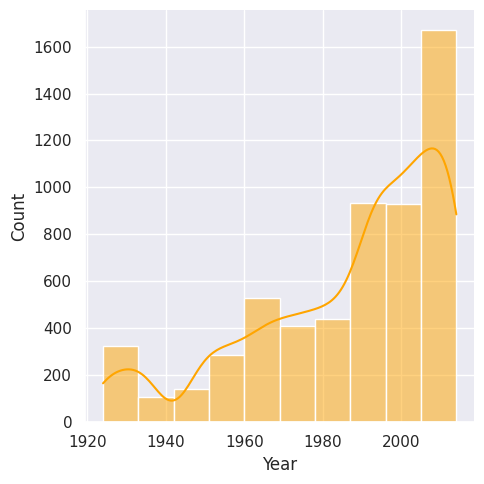

In [58]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(winter["Year"], kde=True, color="orange", bins=10)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



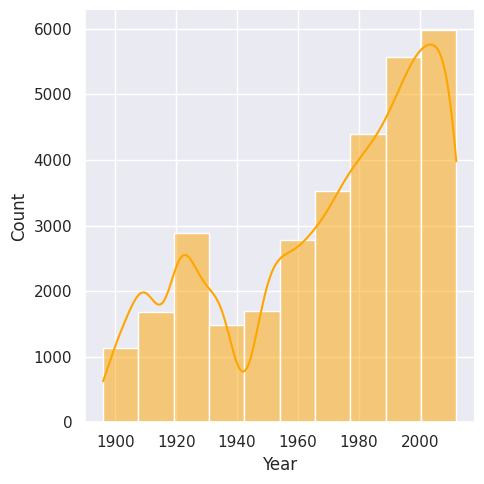

In [59]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(summer["Year"], kde=True, color="orange", bins=10)

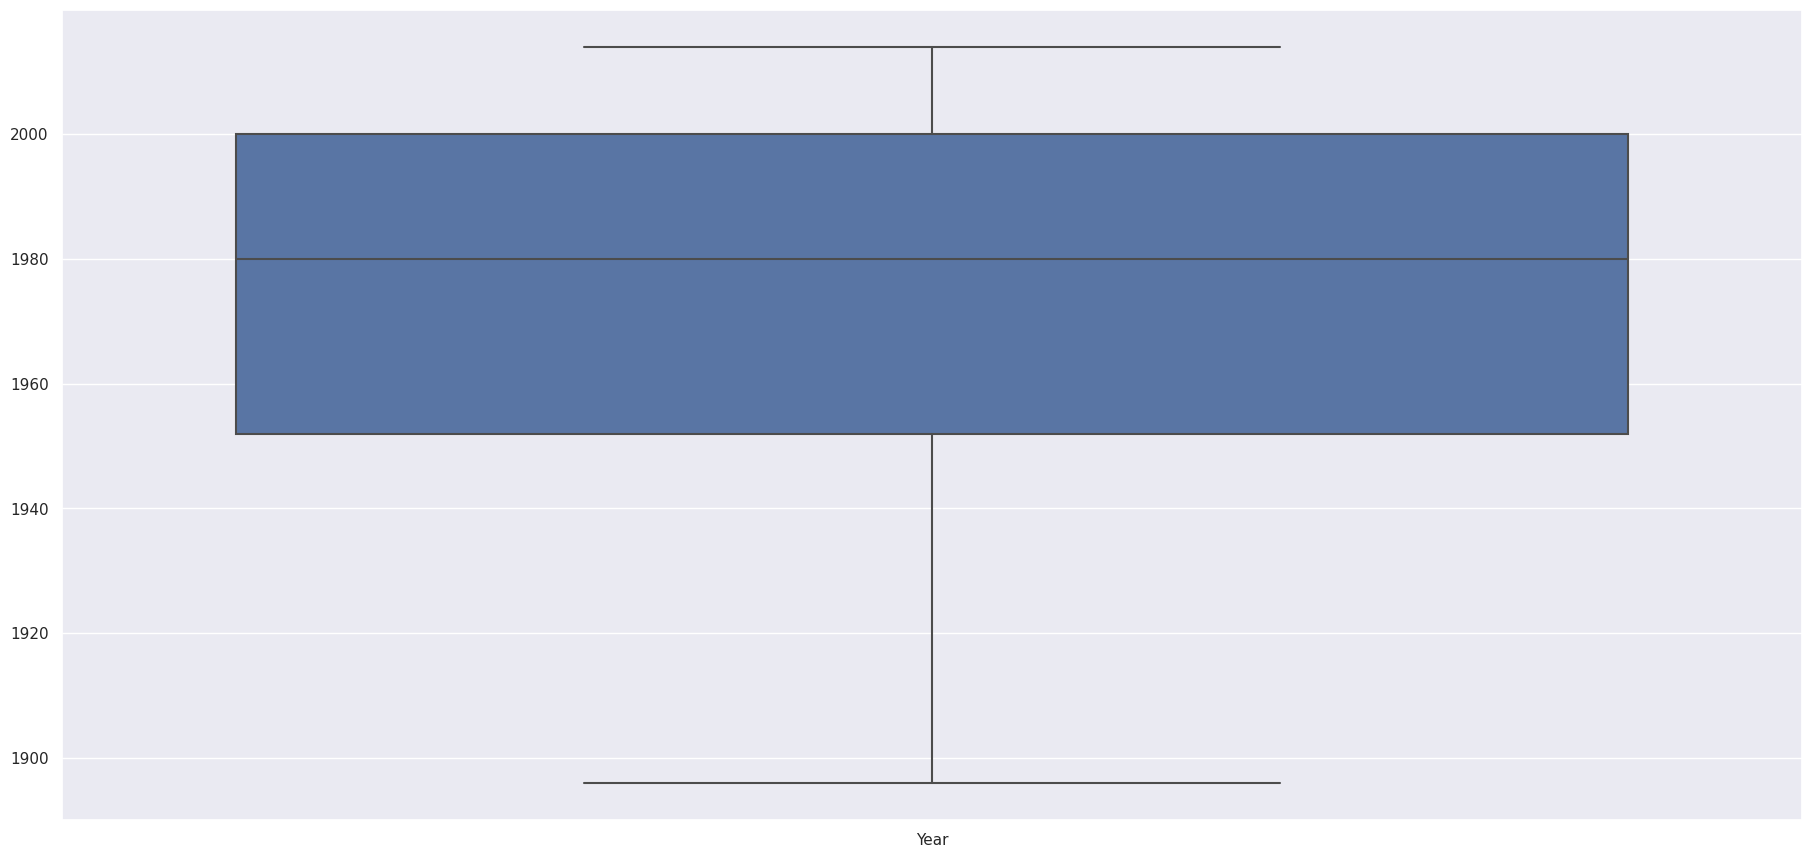

In [60]:
num_cols = olympics.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,10))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()


In [61]:
#plt.figure(figsize=(10,6))
#sns.regplot(x="Edition", y="Year", data=olympics)
#plt.show()


In [62]:
#plt.figure(figsize=(10,6))
#sns.regplot(x="Gender", y="Year", data=olympics)
#plt.show()


In [63]:
#plt.figure(figsize=(10,6))
#sns.regplot(x="City", y="Year", data=olympics)
#plt.show()


In [64]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [65]:
print('Best Countries:')


Best Countries:


In [66]:
olympics.Country_Name.value_counts()

Country_Name
United States            5238
Soviet Union             2489
United Kingdom           1799
Germany                  1665
France                   1548
                         ... 
Virgin Islands*             1
Guyana                      1
Netherlands Antilles*       1
Iraq                        1
Bermuda*                    1
Name: count, Length: 145, dtype: int64

In [67]:
top10 = olympics.Country_Name.value_counts().head(10)

**EN başarılı 10 ülkeyi bul.**

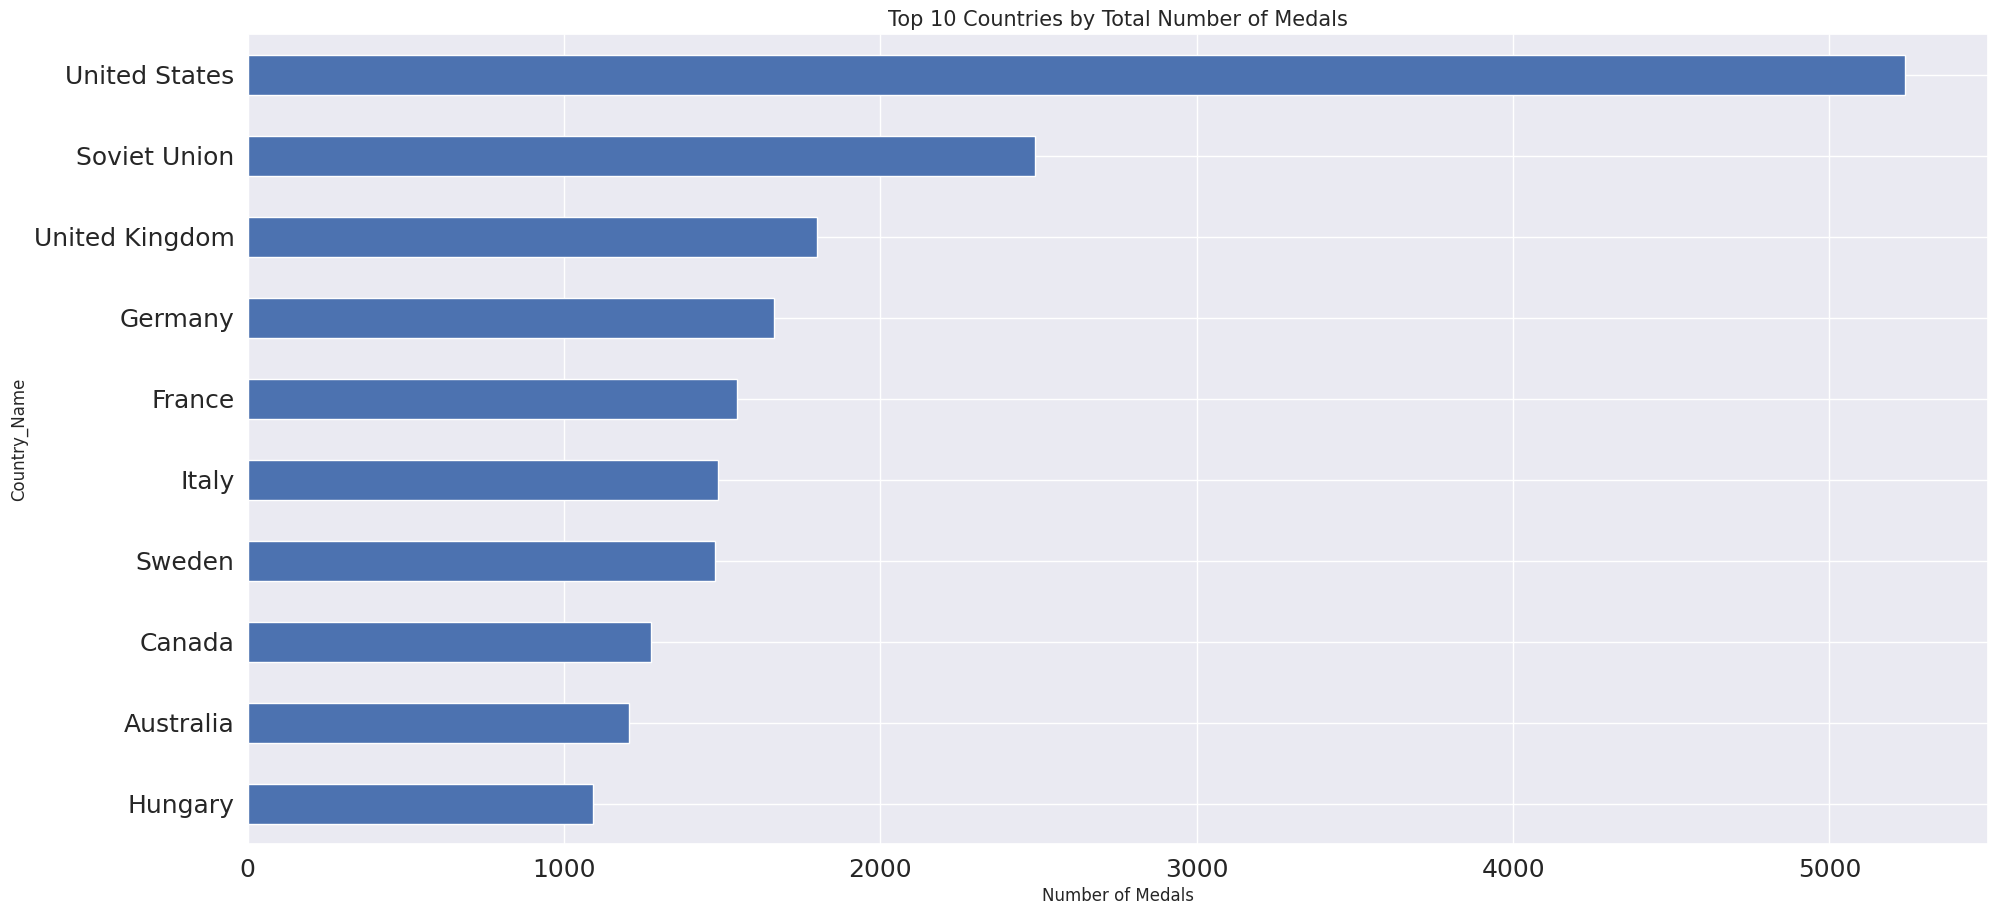

In [68]:
# And now we can plot the top 10 into a figure to visualize them;
top10.plot(kind="barh", figsize = (20, 10), fontsize = 18)
plt.title("Top 10 Countries by Total Number of Medals", fontsize = 15)
plt.xlabel("Number of Medals", fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

In [69]:
# Check the rows in the DataFrame that correspond to the countries that are in the top10;
olympic10 = olympics[olympics.Country_Name.isin(top10.index)]

In [70]:
olympic10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


Türkiye madalya aldı mı? Cinsiyete göre incele:

In [71]:
turkey_data = olympics[olympics['Country_Name'] == 'Turkey']

# Türkiye'nin verilerini görüntüleyin
print(turkey_data)


      Edition  Year     City      Sport           Discipline          Athlete  \
7177   Summer  1936   Berlin  Wrestling      Wrestling Free.   KIREÇÇI, Ahmet   
7190   Summer  1936   Berlin  Wrestling      Wrestling Gre-R     ERKAN, Yasar   
7418   Summer  1948   London  Athletics            Athletics    SARIALP, Ruhi   
7972   Summer  1948   London  Wrestling      Wrestling Free.   BALAMIR, Halit   
7977   Summer  1948   London  Wrestling      Wrestling Free.      AKAR, Nazuh   
...       ...   ...      ...        ...                  ...              ...   
29205  Summer  2008  Beijing  Wrestling      Wrestling Gre-R    AVLUCA, Nazmi   
29603  Summer  2012   London  Athletics            Athletics     BULUT, Gamze   
30922  Summer  2012   London  Taekwondo            Taekwondo       TATAR, Nur   
30925  Summer  2012   London  Taekwondo            Taekwondo  TAZEGUL, Servet   
31136  Summer  2012   London  Wrestling  Wrestling Freestyle    KAYAALP, Riza   

      Code Gender          

In [72]:
gender_counts = turkey_data['Gender'].value_counts()

print("Kadın sporcu sayısı:", gender_counts['Women'])
print("Erkek sporcu sayısı:", gender_counts['Men'])

Kadın sporcu sayısı: 9
Erkek sporcu sayısı: 77


Bu veriler günümüzü içermemektedir. Kadın sporcularımızdan madalya kazananları sayısı artmaktadır.

In [73]:
medal_type = turkey_data['Medal'].value_counts()

print("Altın kazanan sporcu sayısı:", medal_type['Gold'])
print("Gümüş kazanan sporcu sayısı:", medal_type['Silver'])
print("Bronz kazanan sporcu sayısı:", medal_type['Bronze'])

Altın kazanan sporcu sayısı: 38
Gümüş kazanan sporcu sayısı: 25
Bronz kazanan sporcu sayısı: 23


Türkiye en çok hangi spor dalında madalya kazandı?

Cevap: Güreş

In [74]:
sport_type = turkey_data['Sport'].value_counts()

most_common_sport = sport_type.idxmax()
count = sport_type.max()

print("En çok sporcu bulunan spor dalı:", most_common_sport)
print("Sporcu sayısı:", count)

En çok sporcu bulunan spor dalı: Wrestling
Sporcu sayısı: 58


En çok madalya kazanan sporcumuz kimdir?

In [75]:
athlete_name = turkey_data['Athlete'].value_counts()

best_athlete = athlete_name.idxmax()
count = athlete_name.max()

print("En çok madalya kazanan sporcumuz:", best_athlete)
print("Madalya sayısı:", count)

En çok madalya kazanan sporcumuz: SULEYMANOGLU, Naim
Madalya sayısı: 3


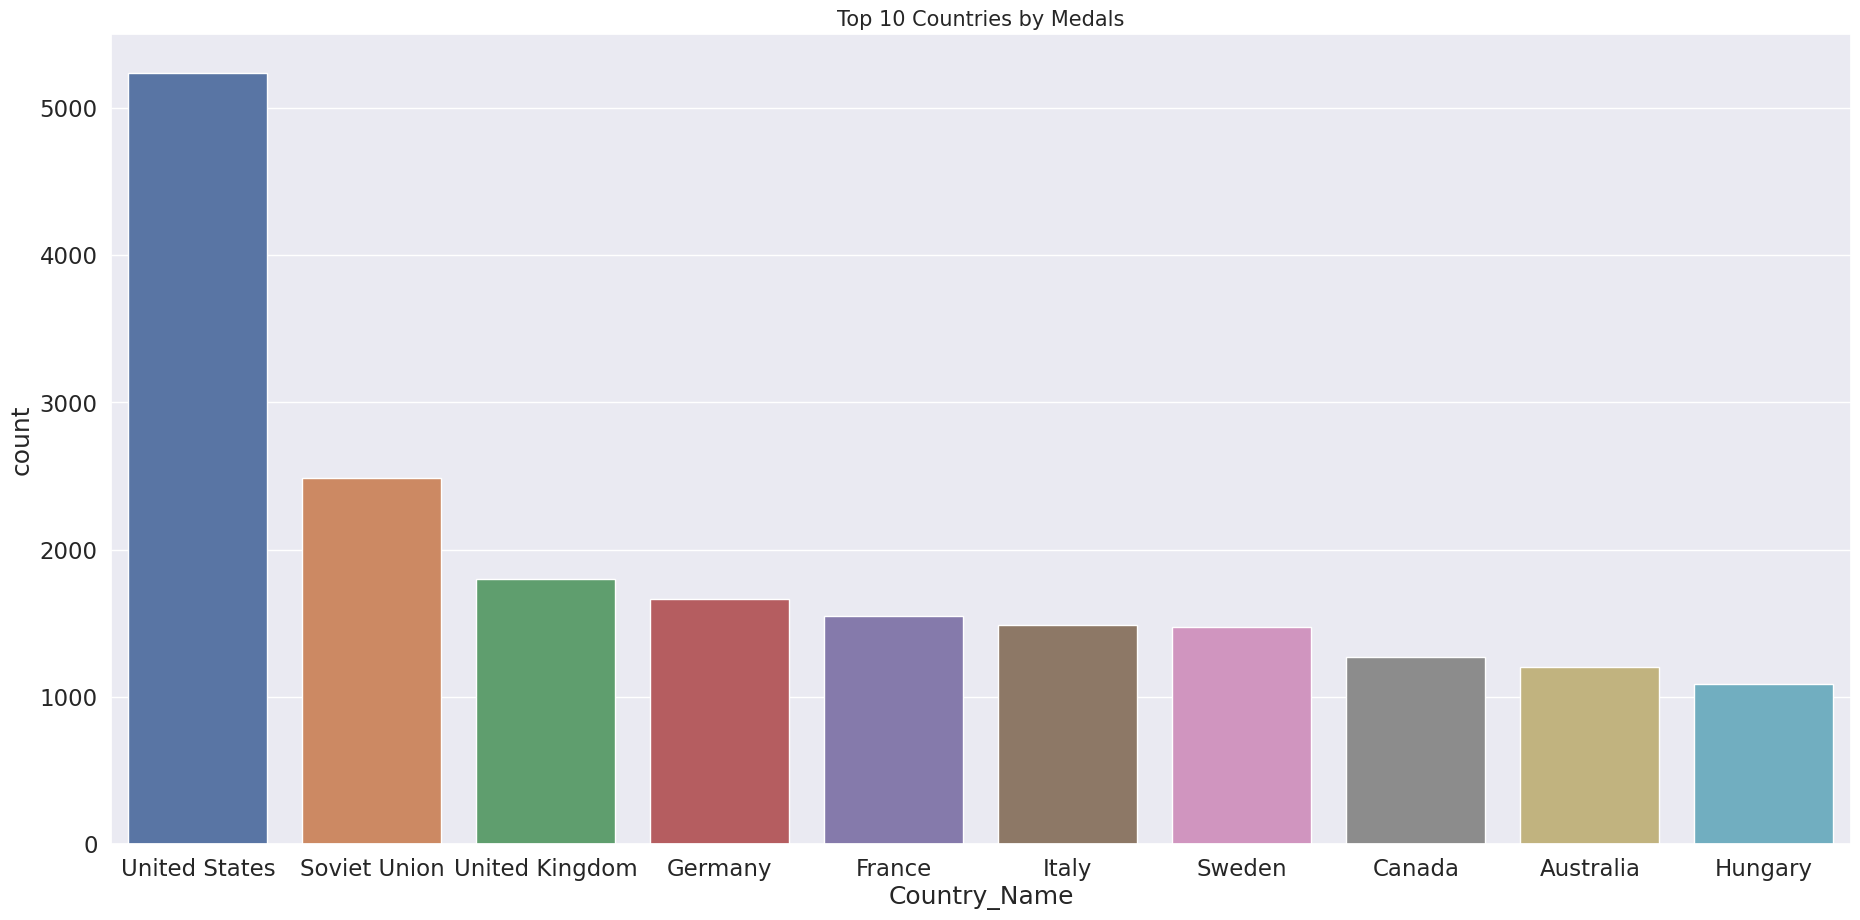

In [76]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
sns.countplot(data = olympic10, x = "Country_Name", order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.show()

**Mevsimlere bölerek başarılı ülkeleri kıyasla**

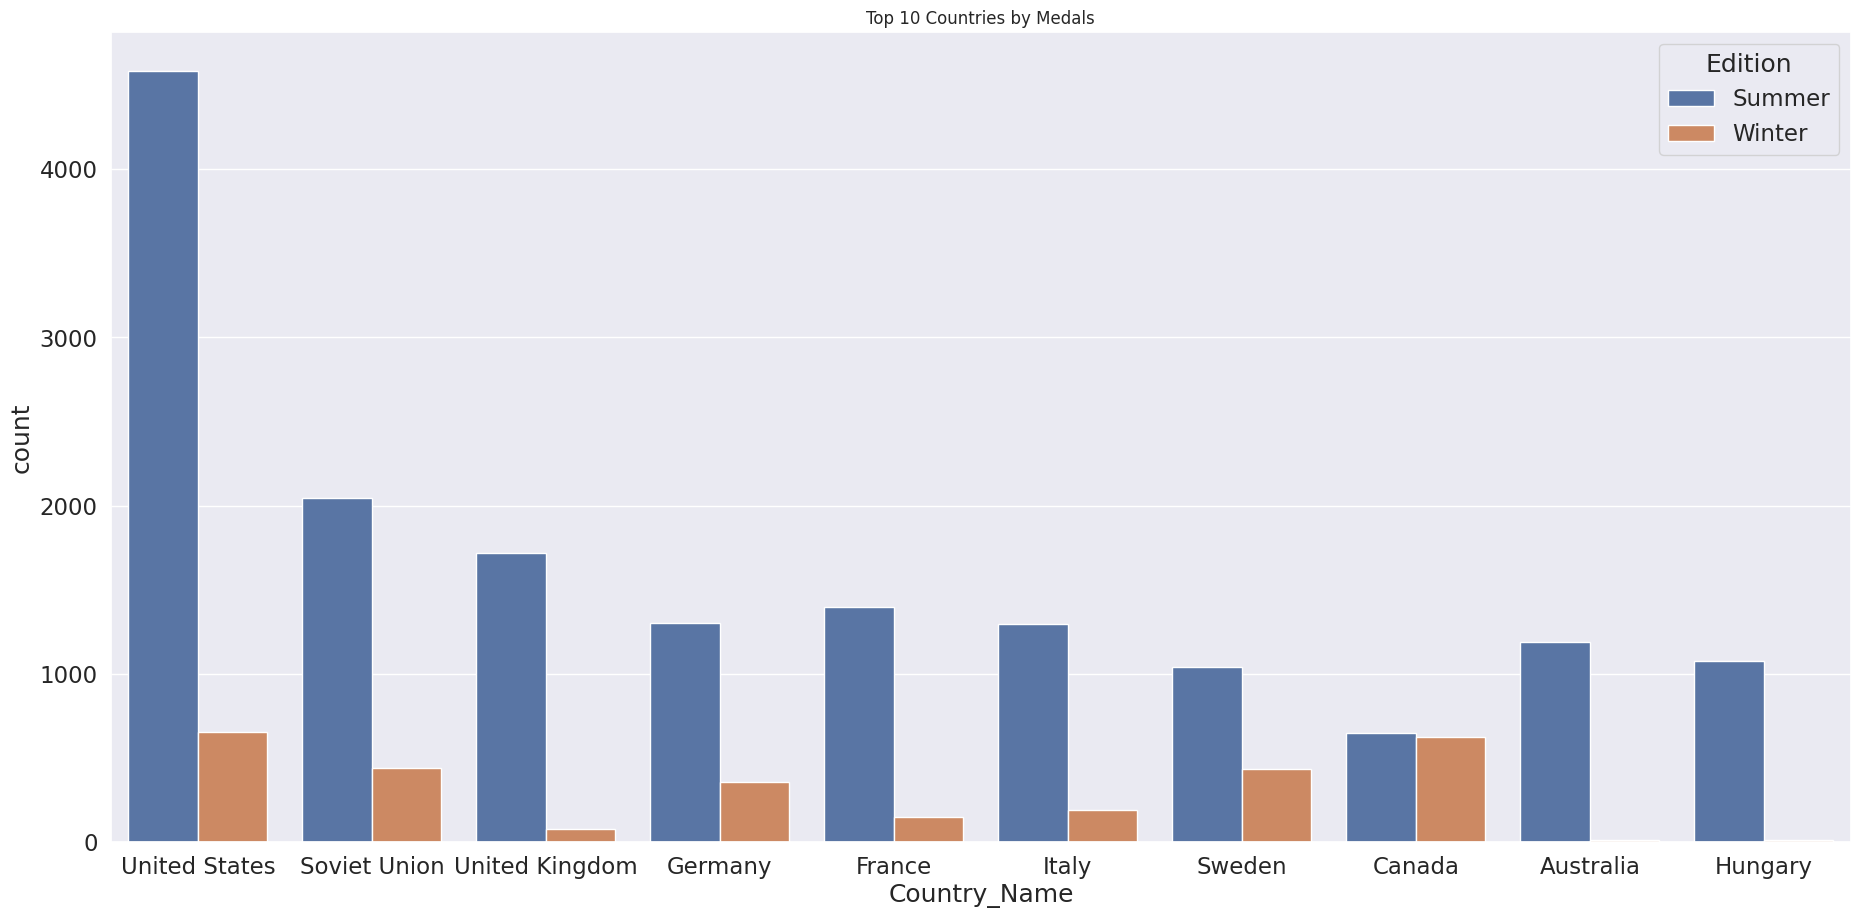

In [77]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
sns.countplot(data = olympic10, x = "Country_Name", hue="Edition", order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 12)
plt.show()

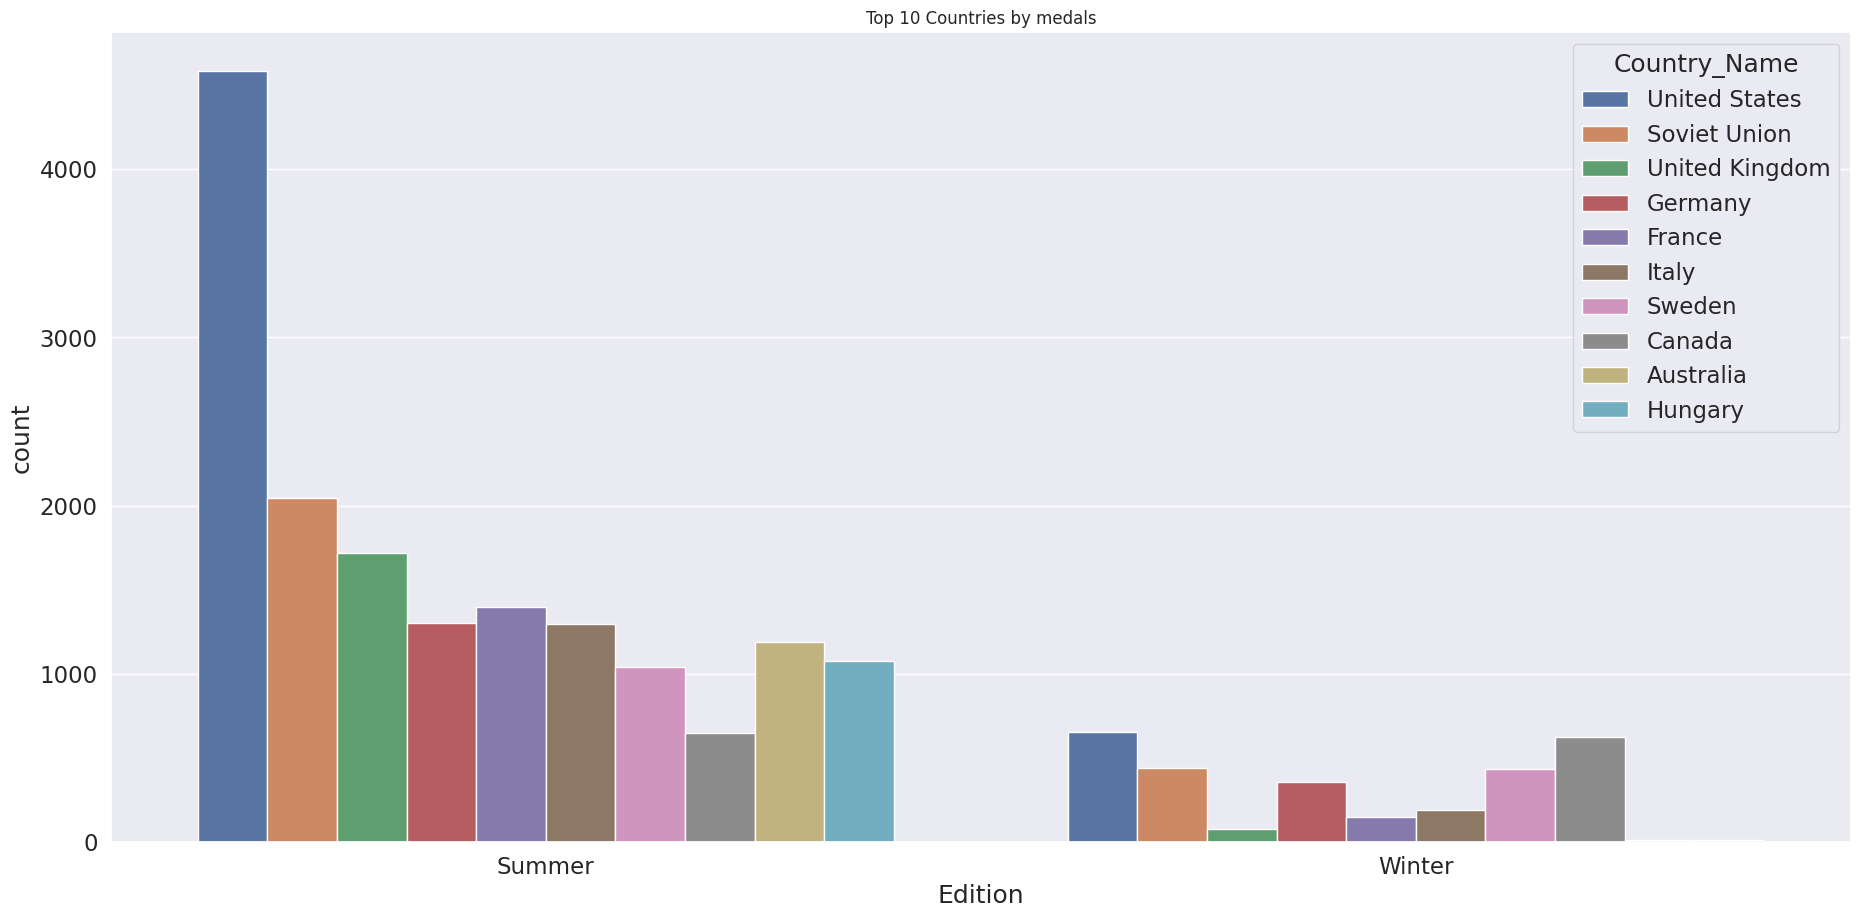

In [78]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
sns.countplot(data = olympic10, x="Edition", hue="Country_Name", hue_order=top10.index)
plt.title("Top 10 Countries by medals", fontsize = 12)
plt.show()

**Ülkelerin aldığı madalya çeşitlerine göre kıyasla:**

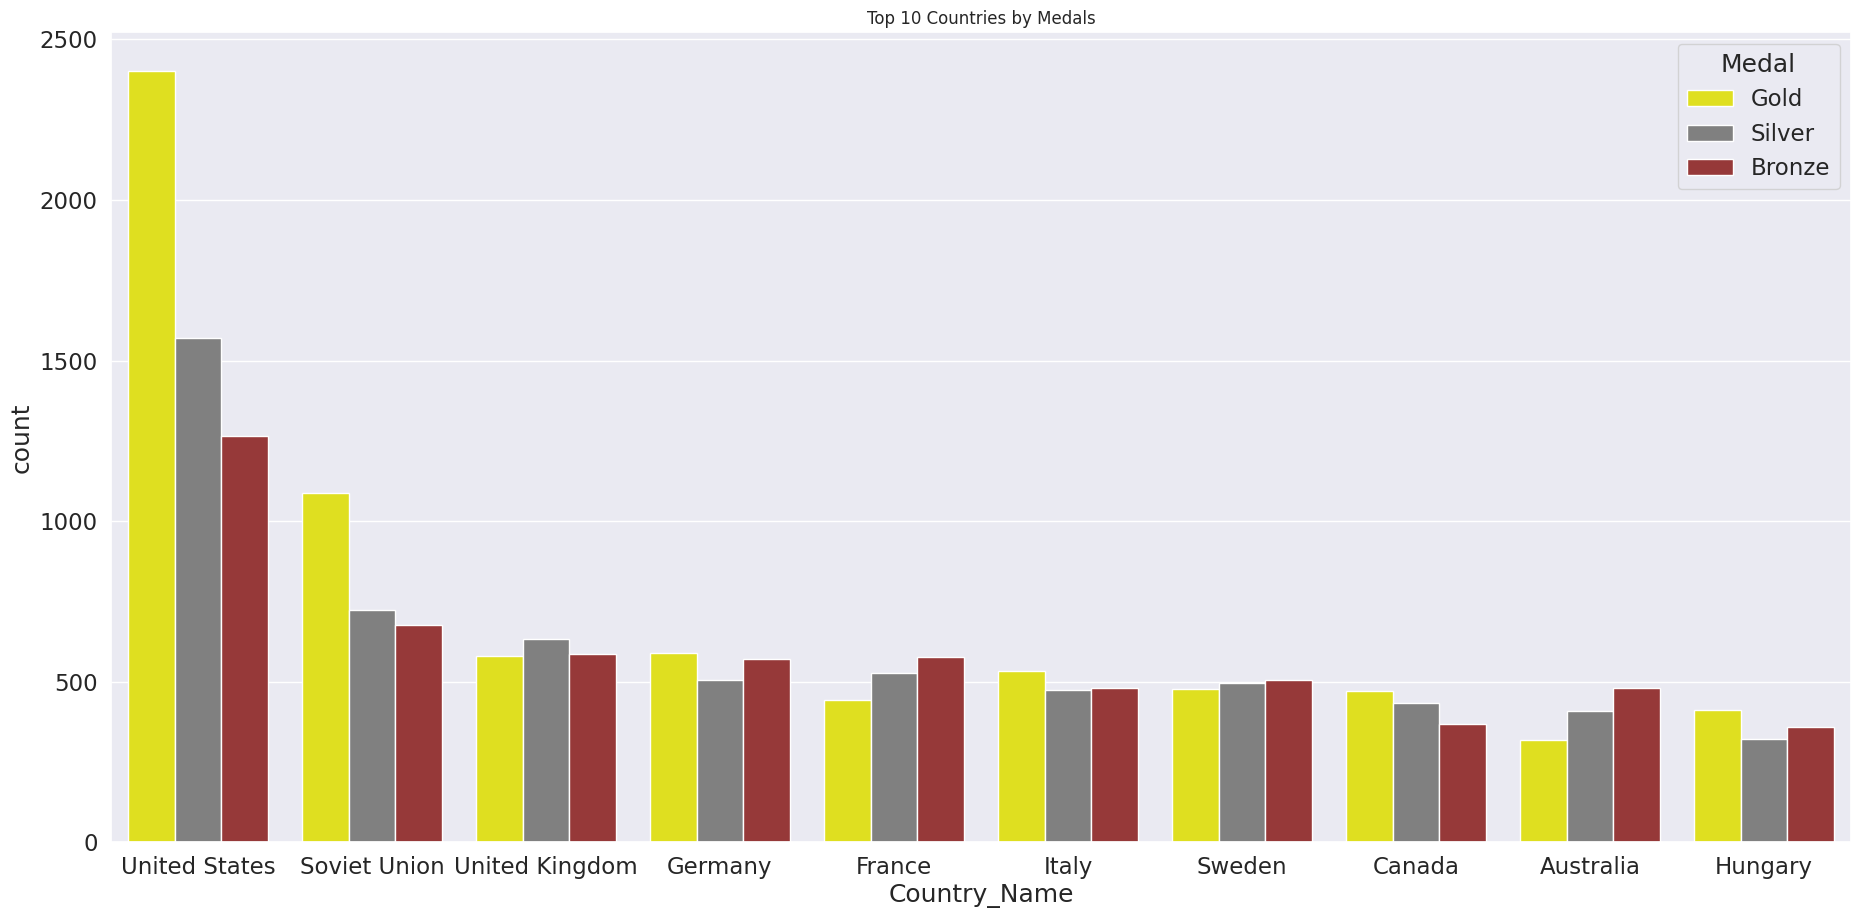

In [79]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
sns.countplot(data = olympic10, x="Country_Name", hue="Medal", order = top10.index, hue_order = ["Gold", "Silver", "Bronze"],
             palette=["yellow", "grey", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 12)
plt.show()

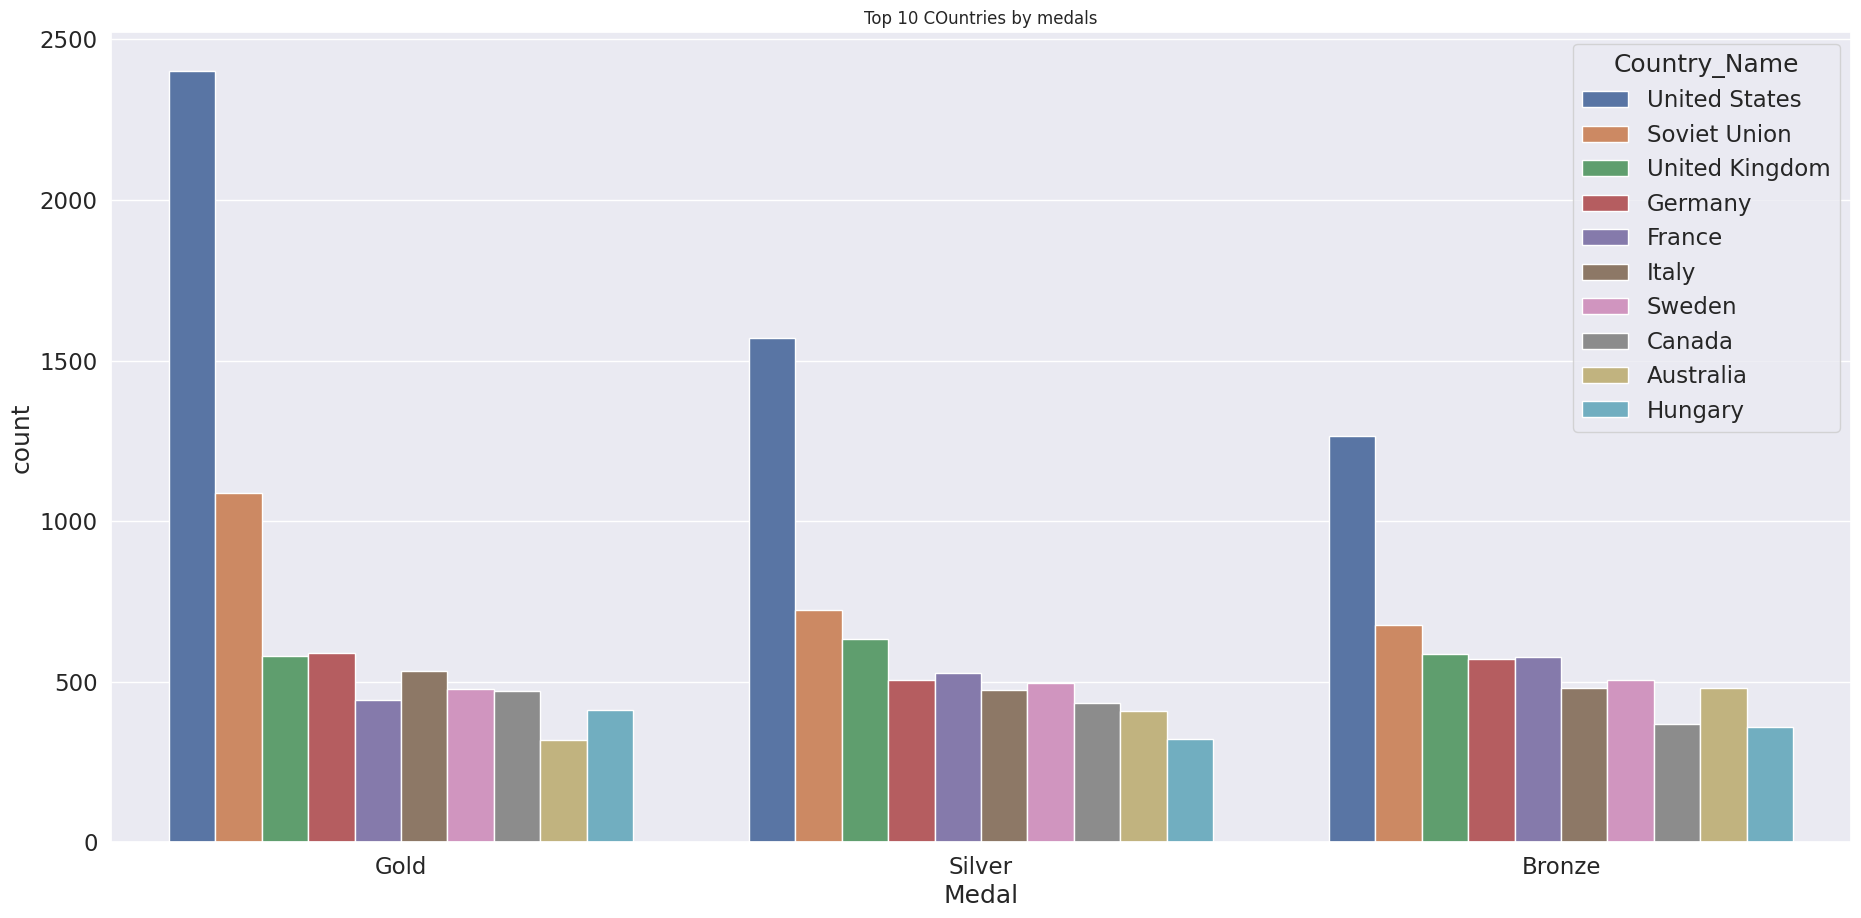

In [80]:
plt.figure(figsize=(20, 10))
sns.set(font_scale = 1.5)
sns.countplot(data = olympic10, x="Medal", hue="Country_Name", order = ["Gold", "Silver", "Bronze"],
             hue_order= top10.index)
plt.title("Top 10 COuntries by medals", fontsize = 12)
plt.show()

# Aggregated and Merged DataFrame

In [81]:
# Creating a new DataFrame with the Countries as Index and the medals as columns;
country_by_medals = pd.crosstab(index= olympics.Country_Name, columns = olympics.Medal,
                               margins = True, margins_name = "Total")
country_by_medals

Medal,Bronze,Gold,Silver,Total
Country_Name,,,,
Afghanistan,2,0,0,2
Algeria,8,5,2,15
Argentina,91,69,99,259
Armenia,8,1,2,11
Australasia,5,20,4,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,143,180,442
Zambia,1,0,1,2


In [82]:
# Dropping the last row
country_by_medals.drop("Total", axis = 0, inplace=True)

In [83]:
country_by_medals

Medal,Bronze,Gold,Silver,Total
Country_Name,,,,
Afghanistan,2,0,0,2
Algeria,8,5,2,15
Argentina,91,69,99,259
Armenia,8,1,2,11
Australasia,5,20,4,29
...,...,...,...,...
West Germany,227,166,191,584
West Indies Federation,5,0,0,5
Yugoslavia,119,143,180,442


In [84]:
# Order the countries by number of medals;
country_by_medals = country_by_medals[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending=False)

In [85]:
country_by_medals.head(20)

Medal,Total,Gold,Silver,Bronze
Country_Name,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


In [86]:
# Checking the countries DataFrame
countries

,Country,Code,Population,GDP_per_Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [87]:
# Merge the columns ["Population"] and ["GDP_per_Capita"] from the dictionary DataFrame into the country_by_medals;
country_by_medals.merge(countries, how = "left", left_index = True, 
                                              right_on = "Country").set_index("Country")

,Total,Gold,Silver,Bronze,Code,Population,GDP_per_Capita
Country,,,,,,,
United States,5238,2402,1571,1265,USA,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN,NaN
United Kingdom,1799,580,632,587,GBR,65138232.0,43875.969614
Germany,1665,589,504,572,GER,81413145.0,41313.313995
France,1548,444,526,578,FRA,66808385.0,36205.568102
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,IRQ,36423395.0,4943.760388
Macedonia,1,0,0,1,MKD,2078453.0,4852.657848
Mauritius,1,0,0,1,MRI,1262605.0,9252.110724


In [88]:
# Now we'll assign the merge combination into the DataFrame itself;
country_by_medals = country_by_medals.merge(countries, how = "left", left_index = True, 
                                              right_on = "Country").set_index("Country")
country_by_medals

,Total,Gold,Silver,Bronze,Code,Population,GDP_per_Capita
Country,,,,,,,
United States,5238,2402,1571,1265,USA,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN,NaN
United Kingdom,1799,580,632,587,GBR,65138232.0,43875.969614
Germany,1665,589,504,572,GER,81413145.0,41313.313995
France,1548,444,526,578,FRA,66808385.0,36205.568102
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,IRQ,36423395.0,4943.760388
Macedonia,1,0,0,1,MKD,2078453.0,4852.657848
Mauritius,1,0,0,1,MRI,1262605.0,9252.110724


In [89]:
# Creating a new column ["Games"] to the DataFrame olympics containing the Year and the City of the event;
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + str(x.City), axis = 1)

In [90]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [91]:
olympics.Games.value_counts()

Games
2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris            

Ülkeler kaç farklı olimpiyat oyununda madalya kazandı? 

In [92]:
# Apllying another lambda function to check how many Olympics each countrie has attend
olympics.groupby("Country_Name").apply(lambda x: x.Games.nunique())

Country_Name
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

United States 48 farklı olimpiyat oyununda madalya kazanmış.

In [93]:
olympics.groupby("Country_Name").apply(lambda x: x.Games.nunique()).sort_values(ascending=False)

Country_Name
United States    48
Sweden           47
France           47
Canada           47
Finland          46
                 ..
Grenada           1
Tanzania          1
Gabon             1
Togo              1
Guatemala         1
Length: 145, dtype: int64

In [94]:
# Creating a ["Total_Games"] column for the country_by_medals DataFrame
country_by_medals["Total_Games"] = olympics.groupby("Country_Name").apply(lambda x: x.Games.nunique())

In [95]:
country_by_medals.head(20).sort_values(by="Total_Games", ascending=False)

,Total,Gold,Silver,Bronze,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,,,,
United States,5238,2402,1571,1265,USA,3.214188e+08,56115.718426,48
France,1548,444,526,578,FRA,6.680838e+07,36205.568102,47
Sweden,1477,476,496,505,SWE,9.798871e+06,50579.673649,47
Canada,1274,470,435,369,CAN,3.585177e+07,43248.529909,47
Finland,890,190,267,433,FIN,5.482013e+06,42311.036231,46
Switzerland,665,151,244,270,SUI,8.286976e+06,80945.079219,46
Norway,1011,368,371,272,NOR,5.195921e+06,74400.369777,44
Italy,1488,534,473,481,ITA,6.080208e+07,29957.804315,43
United Kingdom,1799,580,632,587,GBR,6.513823e+07,43875.969614,42


In [96]:
# Creating a ranked DataFrame because it's more intuitive to check the 
# ranks rather than the absolute values;
country_by_medals.rank(ascending=False).head(20)

,Total,Gold,Silver,Bronze,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,,,,
United States,1.0,1.0,1.0,1.0,6.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,90.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,88.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,92.0,19.0,22.0,3.0
Italy,6.0,5.0,7.0,7.0,71.0,21.0,25.0,9.0
Sweden,7.0,6.0,6.0,6.0,21.0,71.0,10.0,3.0
Canada,8.0,7.0,8.0,12.0,113.0,35.0,15.0,3.0
Australia,9.0,13.0,9.0,8.0,126.0,46.0,6.0,14.0


# Statistical Analysis and Hypothesis Testing

In [97]:
country_by_medals

,Total,Gold,Silver,Bronze,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,,,,
United States,5238,2402,1571,1265,USA,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,NaN,18
United Kingdom,1799,580,632,587,GBR,65138232.0,43875.969614,42
Germany,1665,589,504,572,GER,81413145.0,41313.313995,25
France,1548,444,526,578,FRA,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...,...
Iraq,1,0,0,1,IRQ,36423395.0,4943.760388,1
Macedonia,1,0,0,1,MKD,2078453.0,4852.657848,1
Mauritius,1,0,0,1,MRI,1262605.0,9252.110724,1


In [98]:
# Dropping the columns ["Gold"], ["Silver"], ["Bronze"] because we are only interested in the total number of medals;
country_by_medals.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

In [99]:
country_by_medals

,Total,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,
United States,5238,USA,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,NaN,18
United Kingdom,1799,GBR,65138232.0,43875.969614,42
Germany,1665,GER,81413145.0,41313.313995,25
France,1548,FRA,66808385.0,36205.568102,47
...,...,...,...,...,...
Iraq,1,IRQ,36423395.0,4943.760388,1
Macedonia,1,MKD,2078453.0,4852.657848,1
Mauritius,1,MRI,1262605.0,9252.110724,1


In [100]:
country_by_medals.rank(ascending=False).corr(method = "pearson")

,Total,Code,Population,GDP_per_Capita,Total_Games
Total,1.000000,-0.049224,0.419634,0.458508,0.927611
Code,-0.049224,1.000000,0.077841,-0.123222,-0.050325
Population,0.419634,0.077841,1.000000,-0.239567,0.401448
GDP_per_Capita,0.458508,-0.123222,-0.239567,1.000000,0.497109
Total_Games,0.927611,-0.050325,0.401448,0.497109,1.000000


country_by_medals <b> Testing 3 Hypothesis: </b> 
- Hypothesis 1: There is no relationship between Total Medals and Population.
- Hypothesis 2: There is no relationship between Total Medals and GDP per Capita.
- Hypothesis 3: There is no relationship between Total Medals and Participations.

<b> Hypothesis 1: no relationship between Total Medals and Population.

1'e yaklaştıkça : Pozitif doğrusal ilişki
-1'e yaklaştıkça: Negatif doğrusal ilişki
0'a yaklaştıkça zayıf ilişki veya yok 

In [101]:
# We are passing a nan_policy="omit" because performs the calculations ignoring nan values;
stats.spearmanr(country_by_medals.Total, country_by_medals.Population,
               nan_policy="omit")

SignificanceResult(statistic=0.41975527887063924, pvalue=8.132240868116897e-07)

In [102]:
r, p_value = stats.spearmanr(country_by_medals.Total, country_by_medals.Population,
                            nan_policy="omit")

In [103]:
print("R and P_Value for the first hypothesis:")
print("R = ", r)
print("P_Value = ", p_value)

R and P_Value for the first hypothesis:
R =  0.41975527887063924
P_Value =  8.132240868116897e-07


Rejecting Hypothesis 1 because there is a significant positive relationship between Total Medals and Population.
***
<b> Hypothesis 2: no relationship between Total Medals and GDP per Capita.

In [104]:
r, p_value = stats.spearmanr(country_by_medals.Total, country_by_medals.GDP_per_Capita,
                            nan_policy="omit")


In [105]:
print("R and P_Value for the second hypothesis:")
print("R = ", r)
print("P_Value = ", p_value)

R and P_Value for the second hypothesis:
R =  0.45847787983426685
P_Value =  1.5758169913239602e-07


Also rejecting Hypothesis 2 because the value of R it's positive and it's 0.45, that indicates a positive correlation between Total Medals and GDP per capita.

<b> Hypothesis 3: no relationship between Total Medals and Participations.

In [106]:
# Checking the spearman correlation with only 20 rows;
r, p_value = stats.spearmanr(country_by_medals.head(20).Total,
                            country_by_medals.head(20).Total_Games)

In [107]:

print("R and P_Value for the third hypothesis using 20 rows:")
print("R = ", r)
print("P_Value = ", p_value)

R and P_Value for the third hypothesis using 20 rows:
R =  0.31725778135395594
P_Value =  0.17288753434388834


In [108]:

# Checking the spearman correlation with 50 rows;
r, p_value = stats.spearmanr(country_by_medals.head(50).Total,
                            country_by_medals.head(50).Total_Games)


In [109]:
print("R and P_Value for the third hypothesis using 20 rows:")
print("R = ", r)
print("P_Value = ", p_value)

R and P_Value for the third hypothesis using 20 rows:
R =  0.6818689415046658
P_Value =  4.982151209468708e-08


 
 <b> As sample size goes up, so correlation coefficients fluctuate less around the "true" figure for the population r.

# Train and Test Split

In [110]:
country_by_medals.head()

,Total,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,
United States,5238,USA,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,NaN,18
United Kingdom,1799,GBR,65138232.0,43875.969614,42
Germany,1665,GER,81413145.0,41313.313995,25
France,1548,FRA,66808385.0,36205.568102,47


In [111]:
# NaN içeren satırları düşürelim
country_by_medals.dropna(subset=['Code'], inplace=True)

In [112]:
print("Total madalya değerleri:",country_by_medals["Total"].values)

Total madalya değerleri: [5238 1799 1665 1548 1488 1477 1274 1204 1091 1031 1011  973  890  889
  851  665  642  616  538  512  444  431  426  424  410  339  259  191
  184  184  148  131  128  127  125  121  106  106   93   86   84   76
   61   60   56   55   46   45   45   44   44   39   38   35   33   33
   30   30   28   27   26   25   25   24   23   23   22   21   19   17
   17   16   15   15   12   11   10    9    9    8    8    8    8    7
    7    6    6    6    4    4    4    4    4    4    3    3    3    3
    2    2    2    2    2    2    2    2    2    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1]


In [113]:
country_by_medals["Total"].values.mean()

238.58778625954199

I find mean of total medals.

Ortalamanın altı olanları 0, üstü olanları 1 olarak kümeleyeceğim


In [114]:
country_by_medals.describe()

,Total,Population,GDP_per_Capita,Total_Games
count,131.000000,1.280000e+02,119.000000,131.000000
mean,238.587786,5.198954e+07,16784.231960,10.916031
std,591.992553,1.708173e+08,20049.656356,12.687388
min,1.000000,3.753100e+04,277.068309,1.000000
25%,2.500000,3.838836e+06,3417.807365,2.000000
50%,23.000000,1.096577e+07,8538.589975,6.000000
75%,127.500000,3.825772e+07,22708.722478,14.000000
max,5238.000000,1.371220e+09,101449.968168,48.000000


In [115]:
country_by_medals.head(20)

,Total,Code,Population,GDP_per_Capita,Total_Games
Country,,,,,
United States,5238,USA,3.214188e+08,56115.718426,48
United Kingdom,1799,GBR,6.513823e+07,43875.969614,42
Germany,1665,GER,8.141314e+07,41313.313995,25
France,1548,FRA,6.680838e+07,36205.568102,47
Italy,1488,ITA,6.080208e+07,29957.804315,43
Sweden,1477,SWE,9.798871e+06,50579.673649,47
Canada,1274,CAN,3.585177e+07,43248.529909,47
Australia,1204,AUS,2.378117e+07,56310.962993,30
Hungary,1091,HUN,9.844686e+06,12363.543460,31


In [116]:
country_by_medals.dropna(subset=['GDP_per_Capita'], inplace=True)

In [117]:
X = country_by_medals[["Population","Total_Games"]]
Y = country_by_medals.Total

In [118]:
X

,Population,Total_Games
Country,,
United States,321418820.0,48
United Kingdom,65138232.0,42
Germany,81413145.0,25
France,66808385.0,47
Italy,60802085.0,43
...,...,...
Iraq,36423395.0,1
Macedonia,2078453.0,1
Mauritius,1262605.0,1


In [119]:
Y

Country
United States     5238
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
                  ... 
Iraq                 1
Macedonia            1
Mauritius            1
Niger                1
Togo                 1
Name: Total, Length: 119, dtype: int64

In [120]:
#country_by_medals['Total'] = country_by_medals['Total'].apply(lambda x: 1 if x > (country_by_medals["Total"].values.mean()) else 0)

In [121]:
country_by_medals['Total']

Country
United States     5238
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
                  ... 
Iraq                 1
Macedonia            1
Mauritius            1
Niger                1
Togo                 1
Name: Total, Length: 119, dtype: int64

In [122]:
encoder = LabelEncoder()

In [123]:
Y = encoder.fit_transform(Y)

In [124]:
Y

array([70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54,
       53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 43, 42, 41, 40, 39, 38,
       37, 36, 36, 35, 34, 33, 32, 31, 30, 29, 28, 28, 27, 26, 25, 24, 23,
       23, 22, 22, 21, 20, 19, 18, 18, 17, 16, 16, 15, 14, 13, 12, 12, 11,
       10, 10,  9,  8,  7,  6,  6,  6,  5,  5,  4,  4,  4,  3,  3,  3,  3,
        3,  3,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

75 farklı değere bölerek sıraladığı için ben de iki eşit parçada değerlendireceğim:
0-34:GDP Per Capita Düşük
35-74:GDP Per Capita yüksek

In [125]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=17)

In [126]:
X_train  #sırayı karıştırdı

,Population,Total_Games
Country,,
Colombia,48228704.0,8
Croatia,4224404.0,10
Ireland,4640703.0,12
Burundi,11178921.0,1
Afghanistan,32526562.0,2
...,...,...
Austria,8611088.0,46
Canada,35851774.0,47
Switzerland,8286976.0,46


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
classifier = DecisionTreeClassifier(max_depth = 6)

In [129]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

Gelecek Tahmini:

In [130]:
Y_pred = classifier.predict(X_test)

In [131]:
Y_pred

array([22,  7, 22, 12,  7,  3,  6, 29, 36, 48,  0,  7, 10, 48,  0,  3,  0,
        5,  7,  6,  5,  3,  3,  3, 48,  7,  7,  1,  3, 48,  0, 23, 36, 48,
        0,  1])

In [132]:
Y_test

array([27, 61, 17,  0, 35,  1, 11, 20, 54, 59,  0, 25,  5, 47,  0,  3,  0,
       18, 43,  2, 30,  3, 12,  9, 66, 15, 37,  4,  3, 52,  0, 26, 46, 56,
        0,  1])

If değer< 35 => GDP Per Capita Düşük

In [133]:
pd.DataFrame(data={"Tahmini Değer :": Y_pred, "Gerçek Değer:": Y_test, "Y_Pred Düşük:": (Y_pred )<35, "Y_Test Düşük:": (Y_test )<35 })

,Tahmini Değer :,Gerçek Değer:,Y_Pred Düşük:,Y_Test Düşük:
0,22,27,True,True
1,7,61,True,False
2,22,17,True,True
3,12,0,True,True
4,7,35,True,False
5,3,1,True,True
6,6,11,True,True
7,29,20,True,True
8,36,54,False,False
9,48,59,False,False


In [134]:
from sklearn.metrics import accuracy_score

Ortalamaya göre kıyasladığım için 35'in altına 0 verdim.

In [135]:
Y_test_binary = np.where(Y_test < 35, 0, 1)
Y_pred_binary = np.where(Y_pred < 35, 0, 1)

# Doğruluk (accuracy) hesapladım
acc = accuracy_score(Y_test_binary, Y_pred_binary)

In [136]:
acc

0.8888888888888888

Aslında GDP Per Capita'yı ekleyerek train test yaptım. Acc: 0.77 çıktı. Negatif etkisi olduğunu gördüğüm için GDP yi teste dahil  etmedim. 

Ortalamadan düşük veya yüksekliklerine göre kıyasladım. Tahminlerin hepsi doğru çıkmadı.

Çok başarılı bir sonuç değil ama yüzde 80 üstü olduğu için değerlendirilebilir.

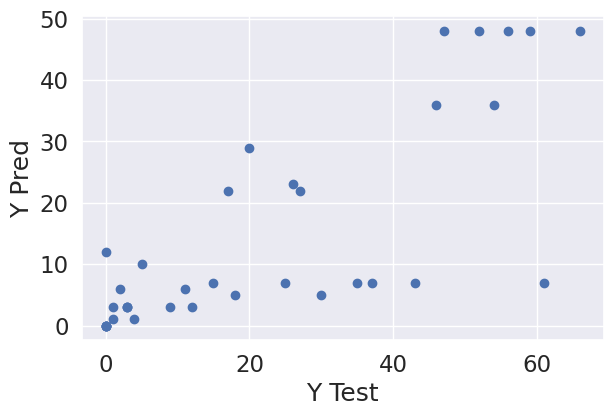

In [137]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Pred")

# Izgara ekleme
plt.grid(True)

# Grafiği gösterme
plt.show()

In [138]:

# Doğrusal regresyon modelini oluşturun
reg = LinearRegression()
reg.fit(X, Y)

# Katsayıları DataFrame'e dönüştürün ve sütun adını belirtin
coeffs = pd.DataFrame(reg.coef_, columns=["Coefficient"], index=X.columns)

# Katsayıları görüntüleyin
print(coeffs)

              Coefficient
Population   1.910835e-08
Total_Games  1.477425e+00


In [139]:
coeffs = pd.DataFrame(reg.coef_,X.columns)
coeffs.columns = ["Coefficient"]
coeffs

,Coefficient
Population,1.910835e-08
Total_Games,1.477425e+00


# Aggregating and Ranking 

Creating a Seaborn heatmap with Medal ranks for top 20 Countries
- Now we'll create columns for man and women, and also for the summer and winter games as well.

In [140]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_Name,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [141]:
summer_v_winter = pd.crosstab(olympics.Country_Name, olympics.Edition)
summer_v_winter

Edition,Summer,Winter
Country_Name,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [142]:
men_v_women = pd.crosstab(olympics.Country_Name, olympics.Gender)

In [143]:
men_v_women

Gender,Men,Women
Country_Name,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [144]:
# Checking differences in the numbers for men and women;
men_v_women.sort_values(by="Men", ascending=False)

Gender,Men,Women
Country_Name,,
United States,3618,1620
Soviet Union,1807,682
United Kingdom,1470,329
France,1351,197
Italy,1292,196
...,...,...
Bahrain,0,1
Costa Rica,0,4
Mozambique,0,2


In [145]:
# Checking differences in the numbers for men and women;
men_v_women.sort_values(by="Women", ascending=False)

Gender,Men,Women
Country_Name,,
United States,3618,1620
Soviet Union,1807,682
China,298,591
Germany,1119,546
Australia,704,500
...,...,...
Iraq,1,0
Eritrea,1,0
Ecuador,2,0


In [146]:
# Concatenating both DataFrames along the columns
full = pd.concat([summer_v_winter, men_v_women], axis = 1)

In [147]:
full

,Summer,Winter,Men,Women
Country_Name,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [148]:
# Creating a ["Total"] column that stands for the sum of summer and winter;
full["Total"] = full.Summer + full.Winter


In [149]:
full

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
Afghanistan,2,0,2,0,2
Algeria,15,0,12,3,15
Argentina,259,0,187,72,259
Armenia,11,0,11,0,11
Australasia,29,0,27,2,29
...,...,...,...,...,...
West Germany,490,94,450,134,584
West Indies Federation,5,0,5,0,5
Yugoslavia,435,7,379,63,442


In [150]:
full.sort_values(by="Total", ascending=False, inplace=True)

In [151]:
full

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [152]:
rank = full.rank(ascending=False, method="average")

In [153]:
rank

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Iraq,132.5,95.5,127.0,120.0,133.5
Senegal,132.5,95.5,127.0,120.0,133.5
Macedonia,132.5,95.5,127.0,120.0,133.5


In [154]:
top50 = rank.head(50)

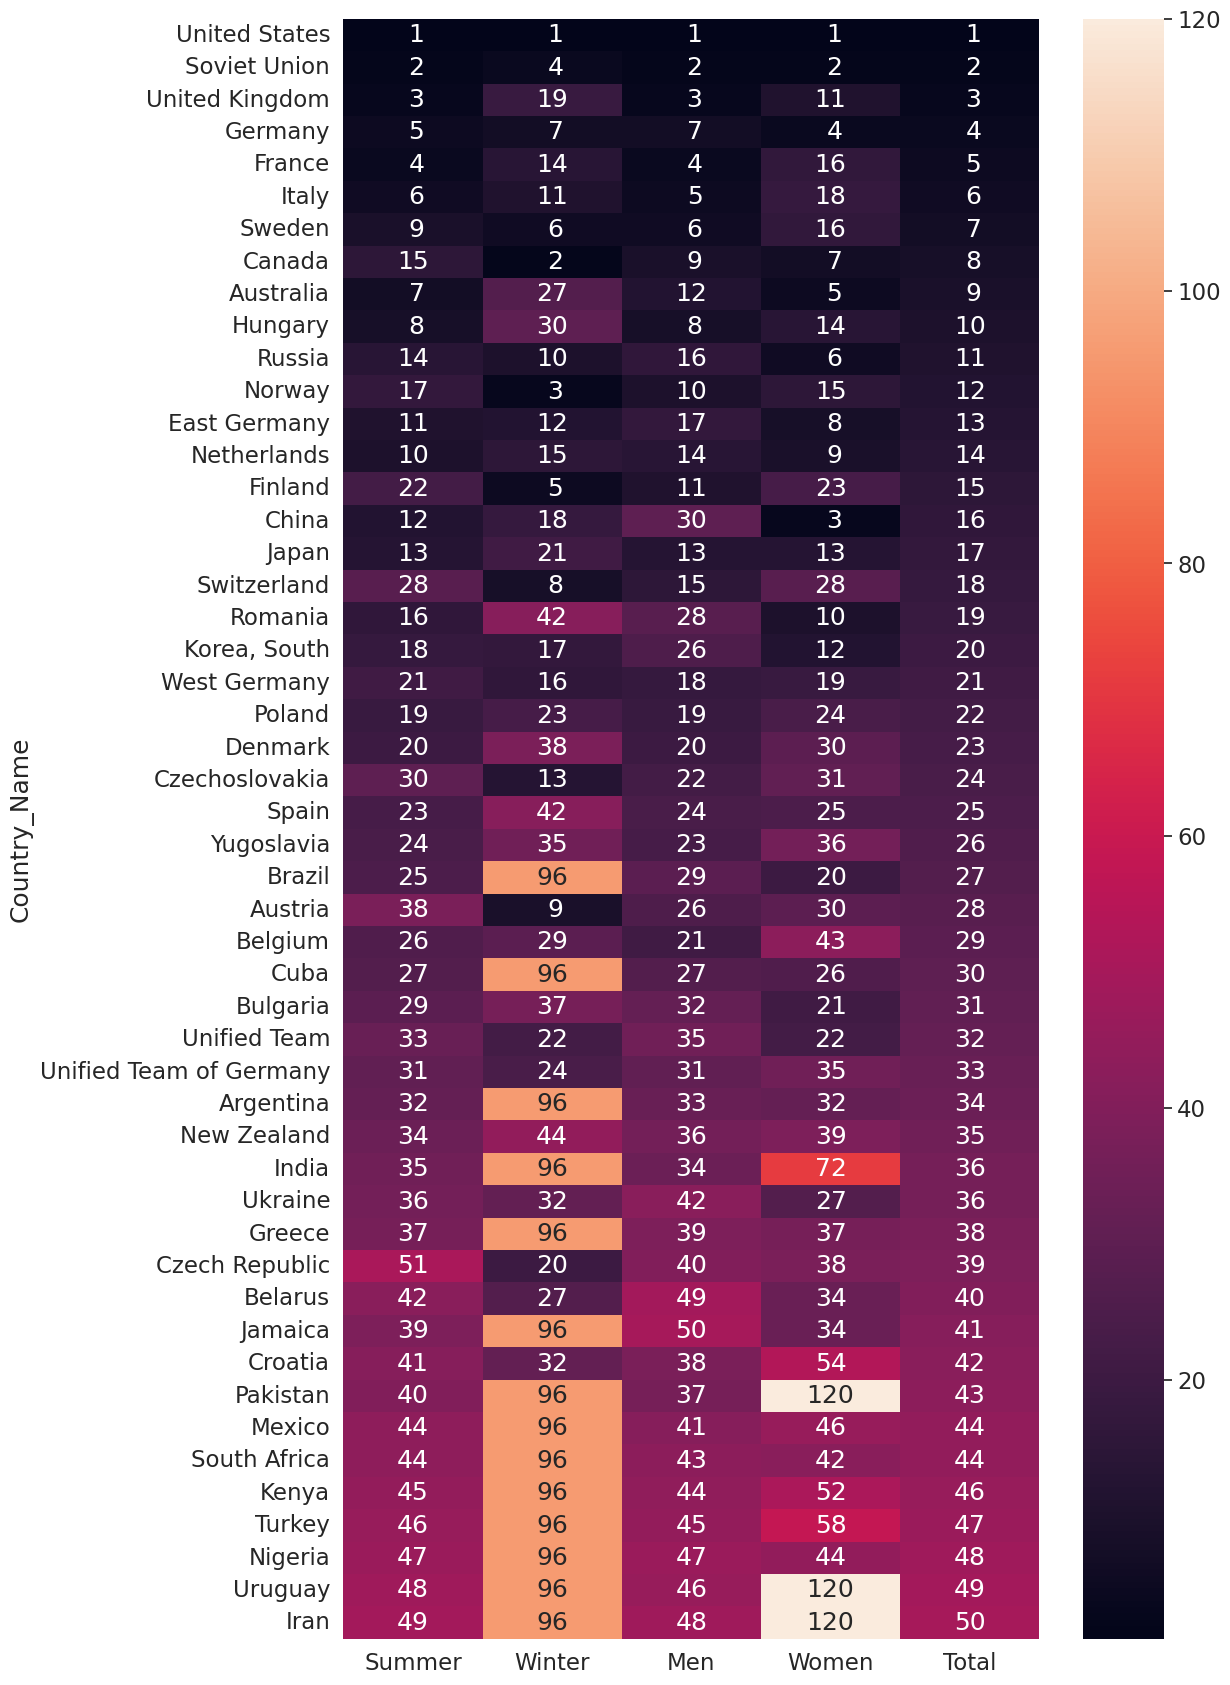

In [155]:
plt.figure(figsize=(10, 20))
sns.heatmap(top50, annot=True, fmt='2.0f')
plt.show()

# Comparing Summer and Winter Olimpics

In [156]:
# Identify the most successful countries at Summer games first:
top50.sort_values("Summer")

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Germany,5.0,7.0,7.0,4.0,4.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,27.0,12.0,5.0,9.0
Hungary,8.0,30.0,8.0,14.0,10.0
Sweden,9.0,6.0,6.0,16.5,7.0


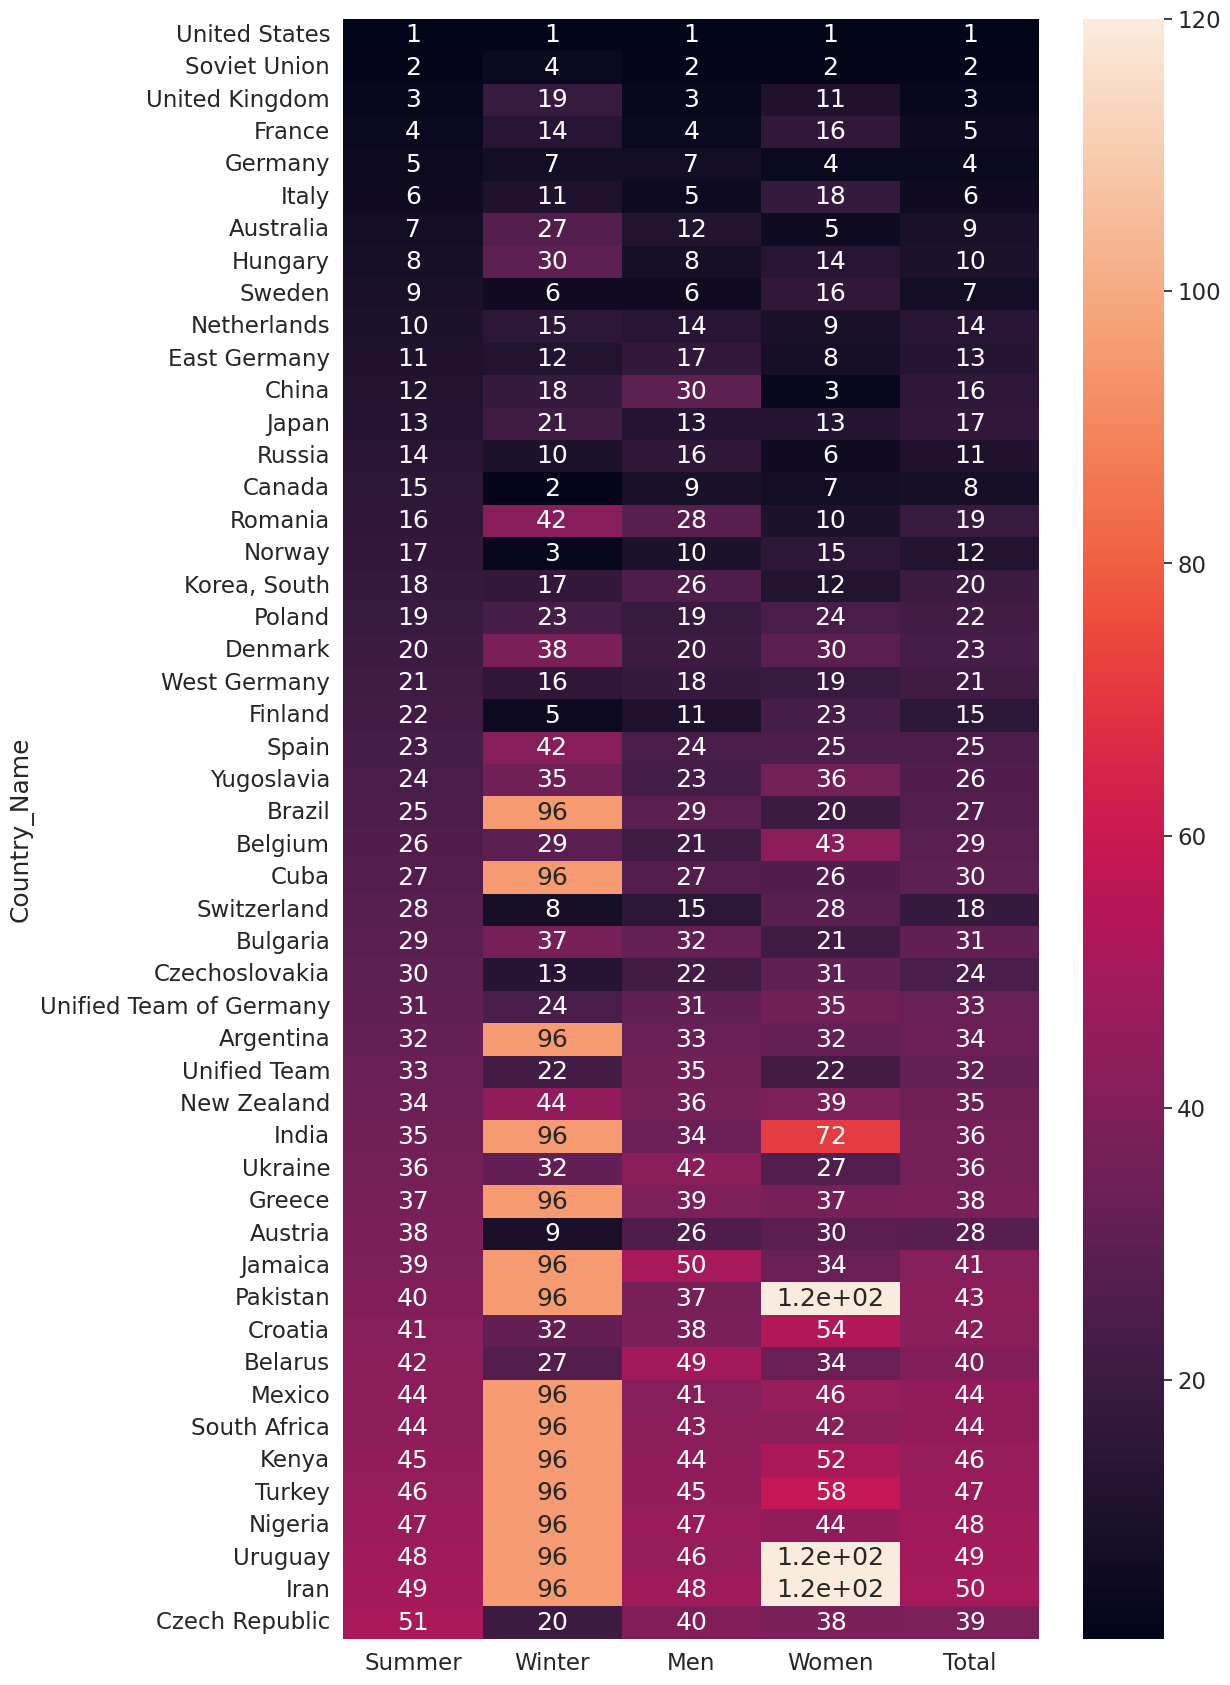

In [157]:
plt.figure(figsize=(10, 20))
sns.heatmap(top50.sort_values("Summer"), annot=True)
plt.show()

In [158]:
top50.sort_values("Winter")

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Germany,5.0,7.0,7.0,4.0,4.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0


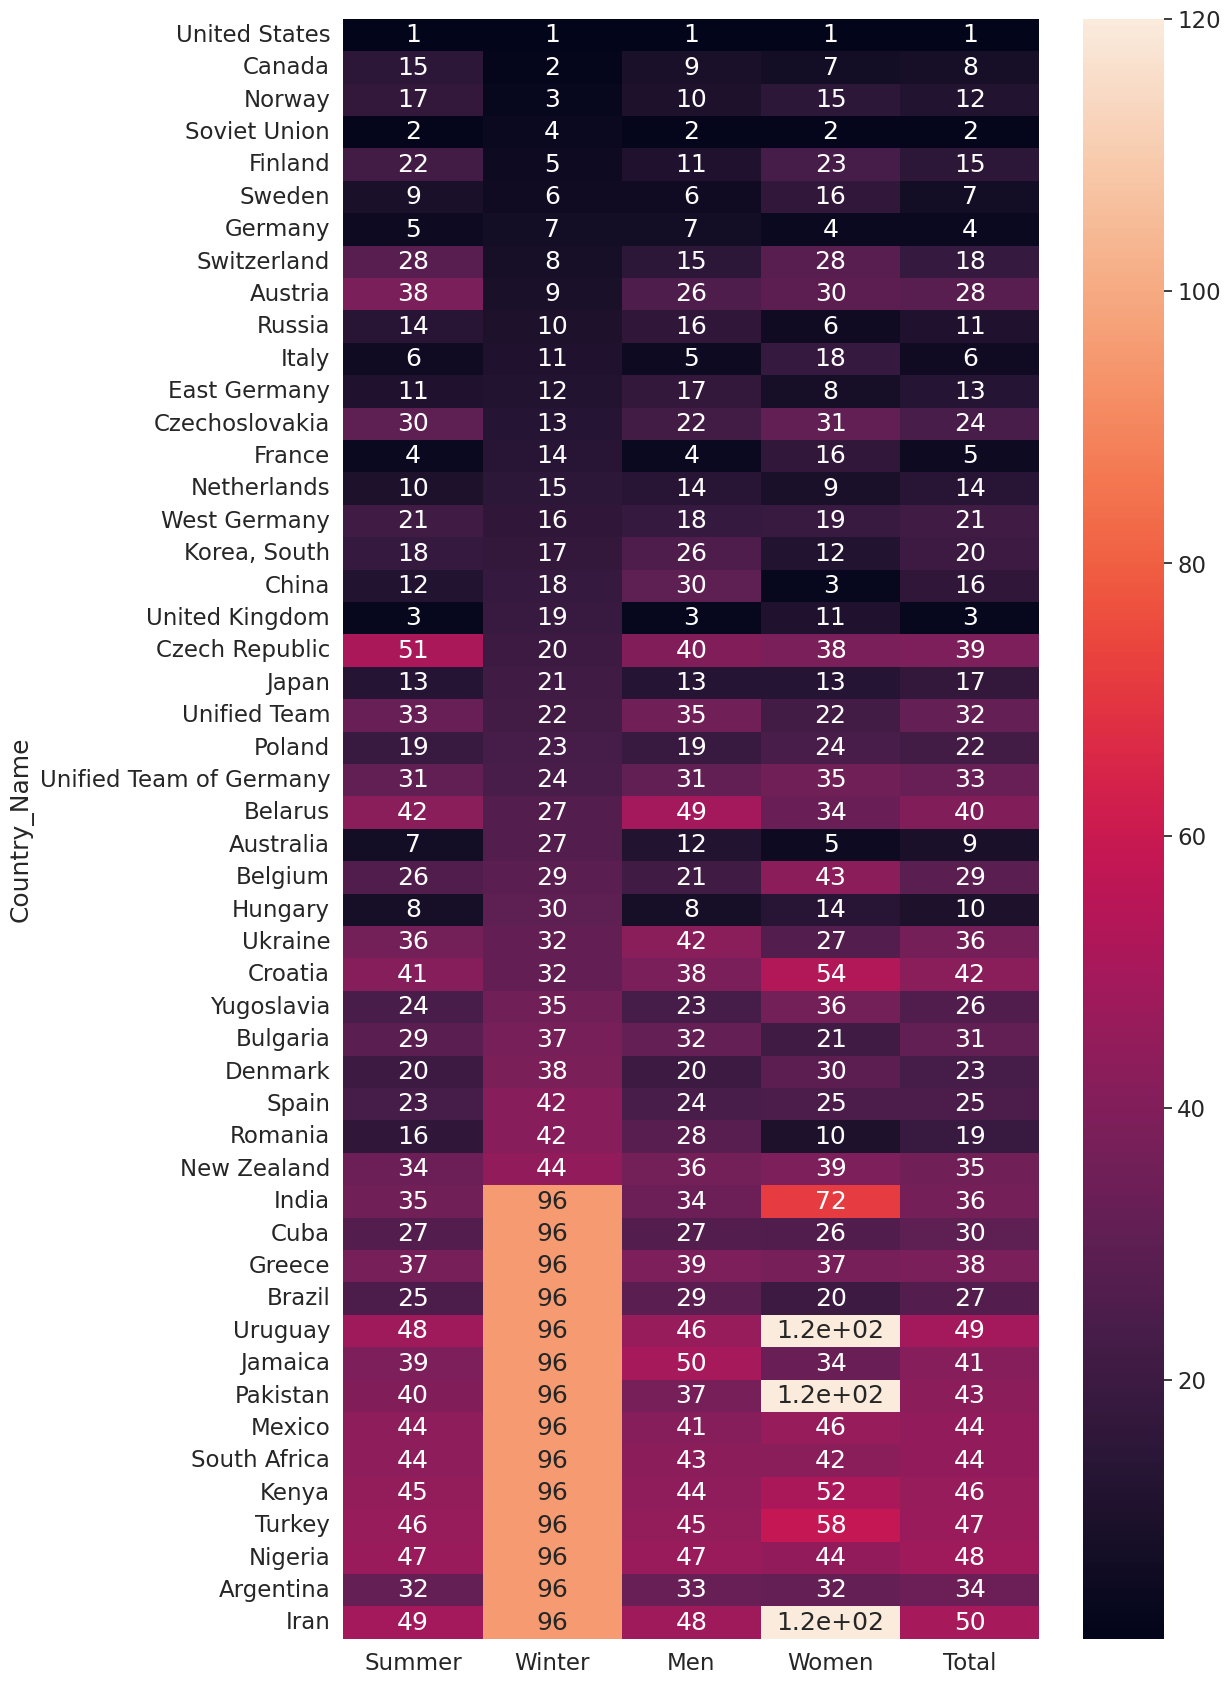

In [159]:
plt.figure(figsize=(10, 20))
sns.heatmap(top50.sort_values("Winter"), annot=True)
plt.show()

In [160]:
# Explaining the logic of the subtraction. As closer to zero that the result gets, it means that the country is as successful at winter games
# as it is at summer games.
top50.Summer.sub(top50.Winter).sort_values()

Country_Name
Brazil                    -70.5
Cuba                      -68.5
Argentina                 -63.5
India                     -60.5
Greece                    -58.5
Jamaica                   -56.5
Pakistan                  -55.5
South Africa              -52.0
Mexico                    -52.0
Kenya                     -50.5
Turkey                    -49.5
Nigeria                   -48.5
Uruguay                   -47.5
Iran                      -46.5
Romania                   -25.5
Hungary                   -22.0
Australia                 -20.0
Denmark                   -18.5
Spain                     -18.5
United Kingdom            -16.0
Yugoslavia                -11.0
New Zealand               -10.5
France                    -10.0
Japan                      -8.0
Bulgaria                   -8.0
China                      -6.0
Netherlands                -5.0
Italy                      -5.0
Poland                     -4.0
Belgium                    -3.0
Soviet Union               

Ülkelerin iklimleri spor branlarını etkilemiş.

In [161]:
rank_diff = top50.Summer.sub(top50.Winter).sort_values().to_frame()
rank_diff

,0
Country_Name,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
South Africa,-52.0
Mexico,-52.0


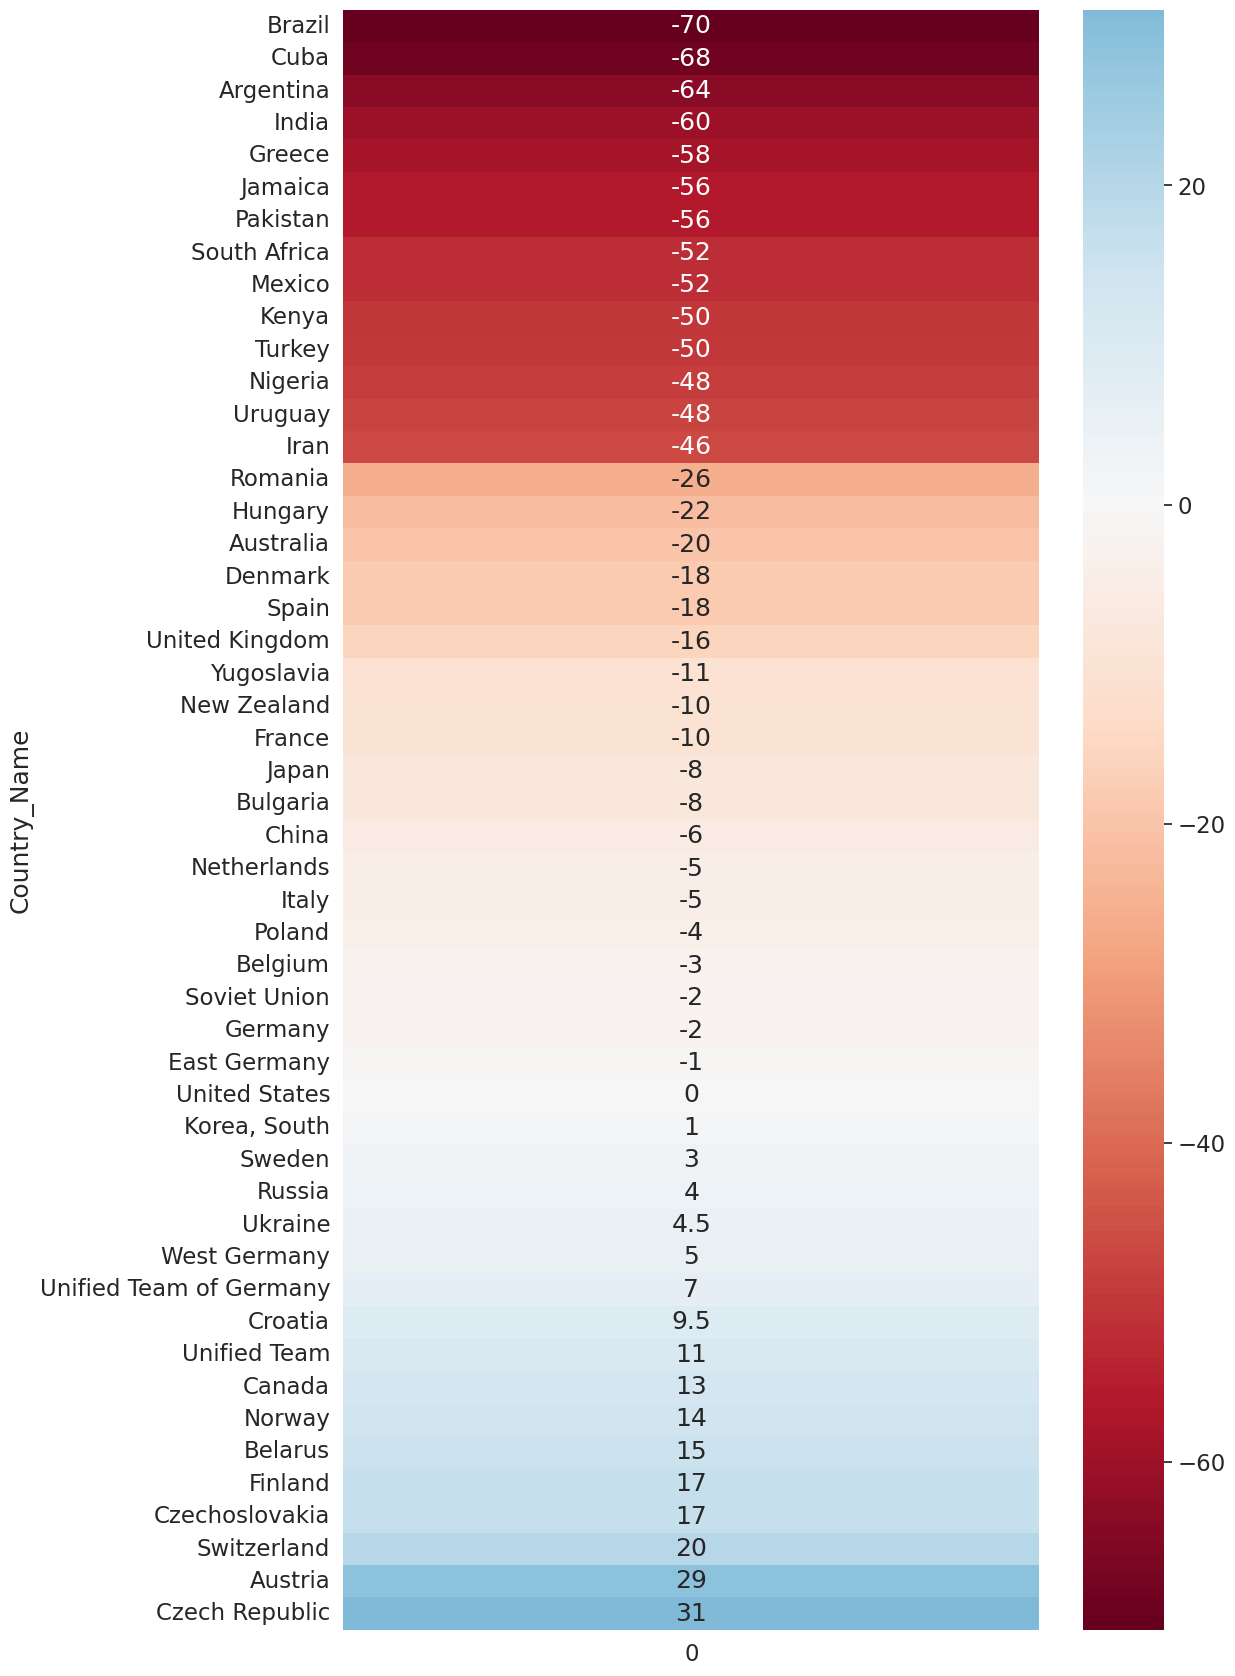

In [162]:
plt.figure(figsize=(10, 20))
sns.heatmap(rank_diff, cmap="RdBu", annot=True, center = 0)
plt.show()

At the top we have the Summer Countries, like Brazil, Cuba, Argentina, India an so on. At the bottom we have Winter Countries like Switzerland, Austria and Czech Republic. In the middle of the heat map with some neutral values, we have countries that has Geographical Diversity, a long and hot sommer and also a long and cold winter. So we can conclude that geographical and climatic diversity is the key to the overall success.

# Gender,Culture and Religion Analysis

In [163]:
# Applying the same logic as the previous example, calculating both metrics and
# the difference between them;
top50.sort_values("Men")

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Germany,5.0,7.0,7.0,4.0,4.0
Hungary,8.0,30.0,8.0,14.0,10.0
Canada,15.0,2.0,9.0,7.0,8.0


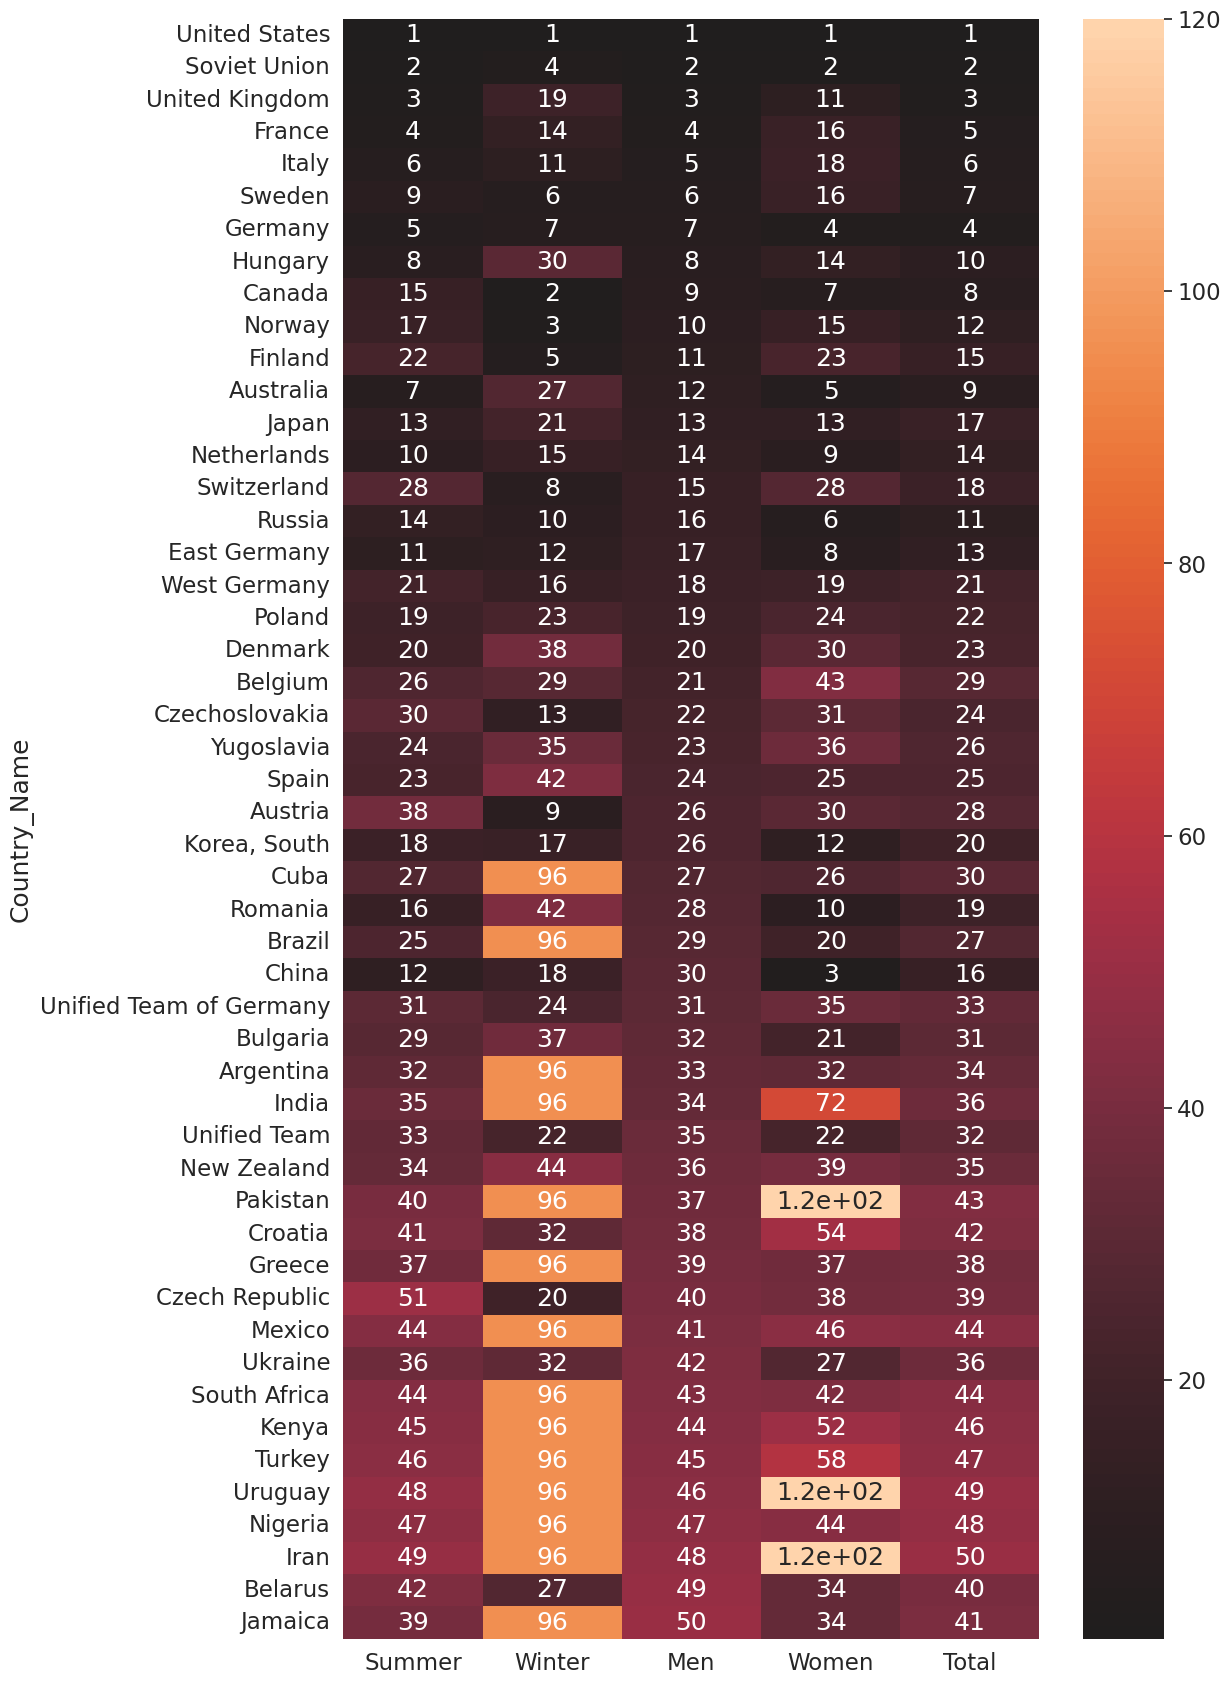

In [164]:
plt.figure(figsize= (10, 20))
sns.heatmap(top50.sort_values("Men"), annot=True, center = 0)
plt.show()

Örnek: Kanada Kış olimpiyatlarında 2.sırada

In [165]:
top50.sort_values("Women")

,Summer,Winter,Men,Women,Total
Country_Name,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
China,12.0,18.0,30.0,3.0,16.0
Germany,5.0,7.0,7.0,4.0,4.0
Australia,7.0,27.0,12.0,5.0,9.0
Russia,14.0,10.0,16.0,6.0,11.0
Canada,15.0,2.0,9.0,7.0,8.0
East Germany,11.0,12.0,17.0,8.0,13.0
Netherlands,10.0,15.0,14.0,9.0,14.0


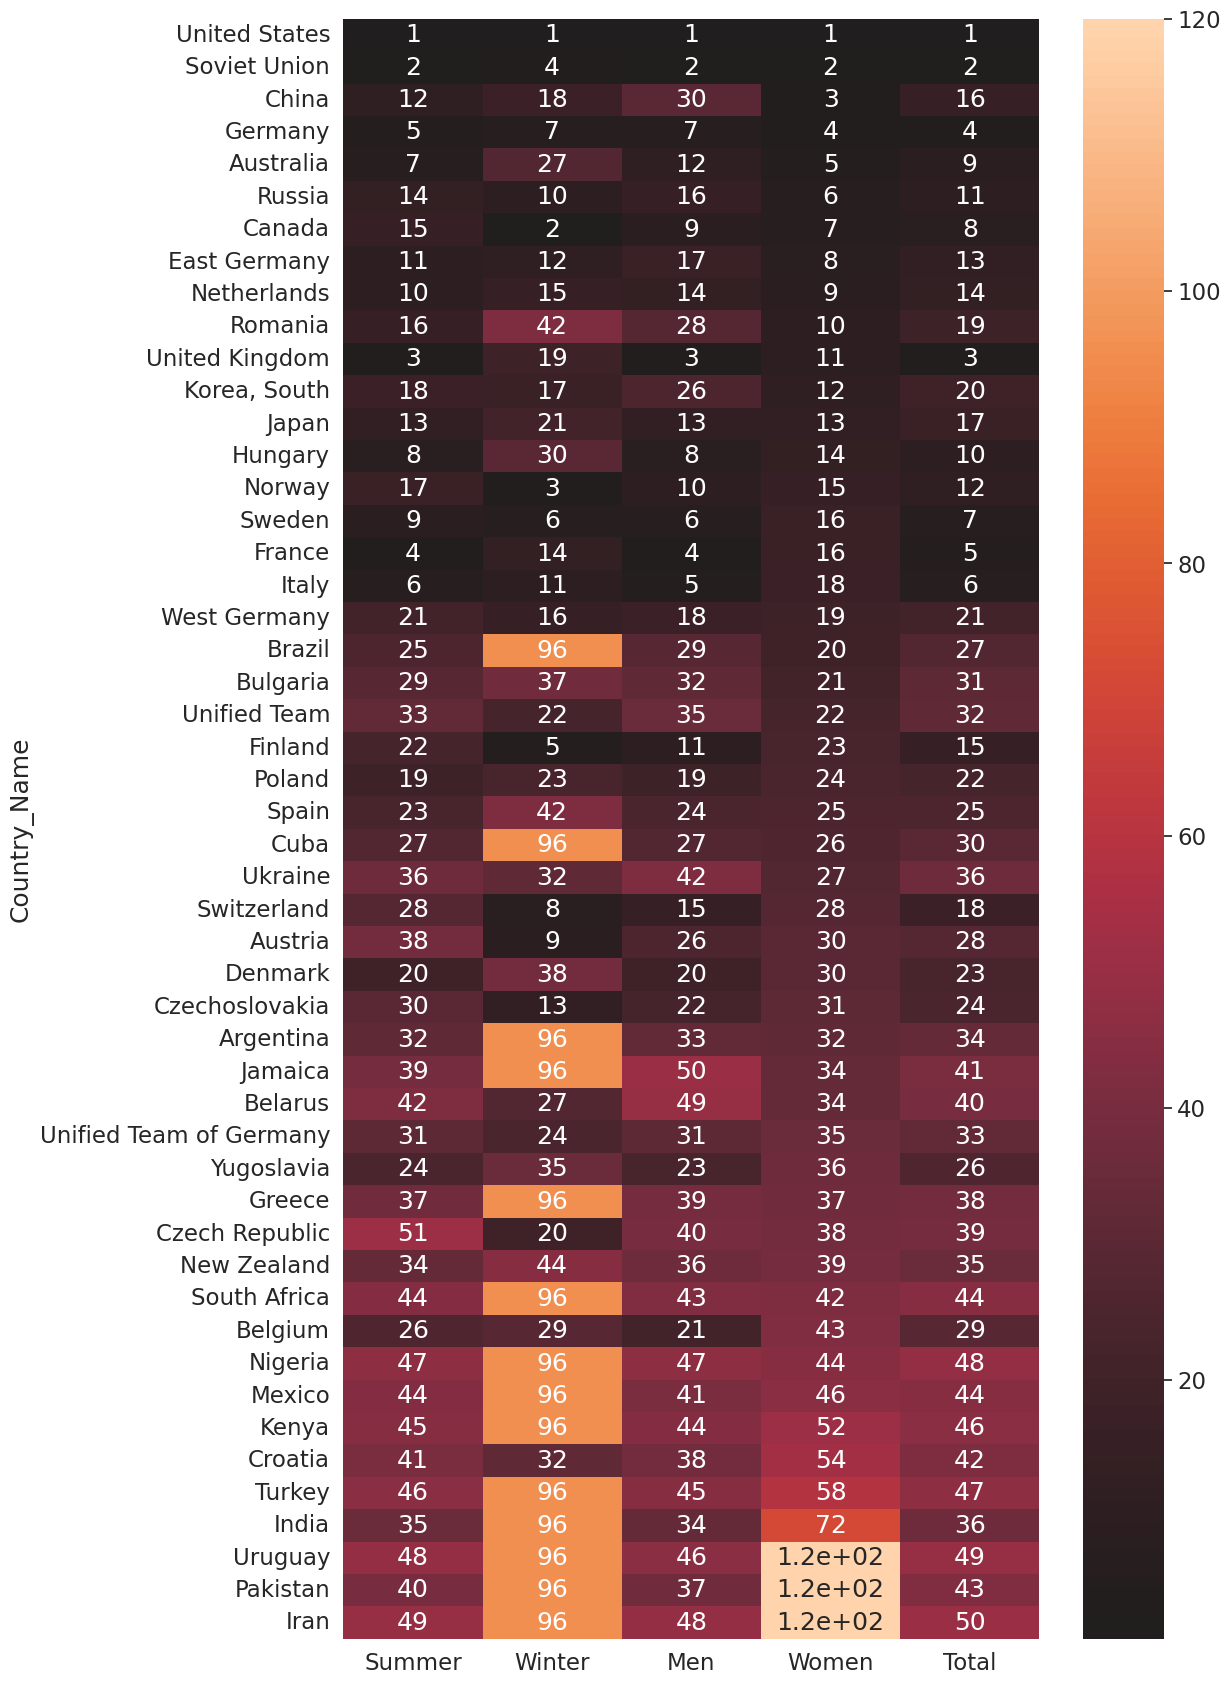

In [166]:
plt.figure(figsize=(10, 20))
sns.heatmap(top50.sort_values("Women"), annot=True, center = 0)
plt.show()

In [167]:
rank_diff2 = top50.Men.sub(top50.Women).sort_values().to_frame()

In [168]:
rank_diff2

,0
Country_Name,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-37.5
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Yugoslavia,-13.0
Italy,-13.0


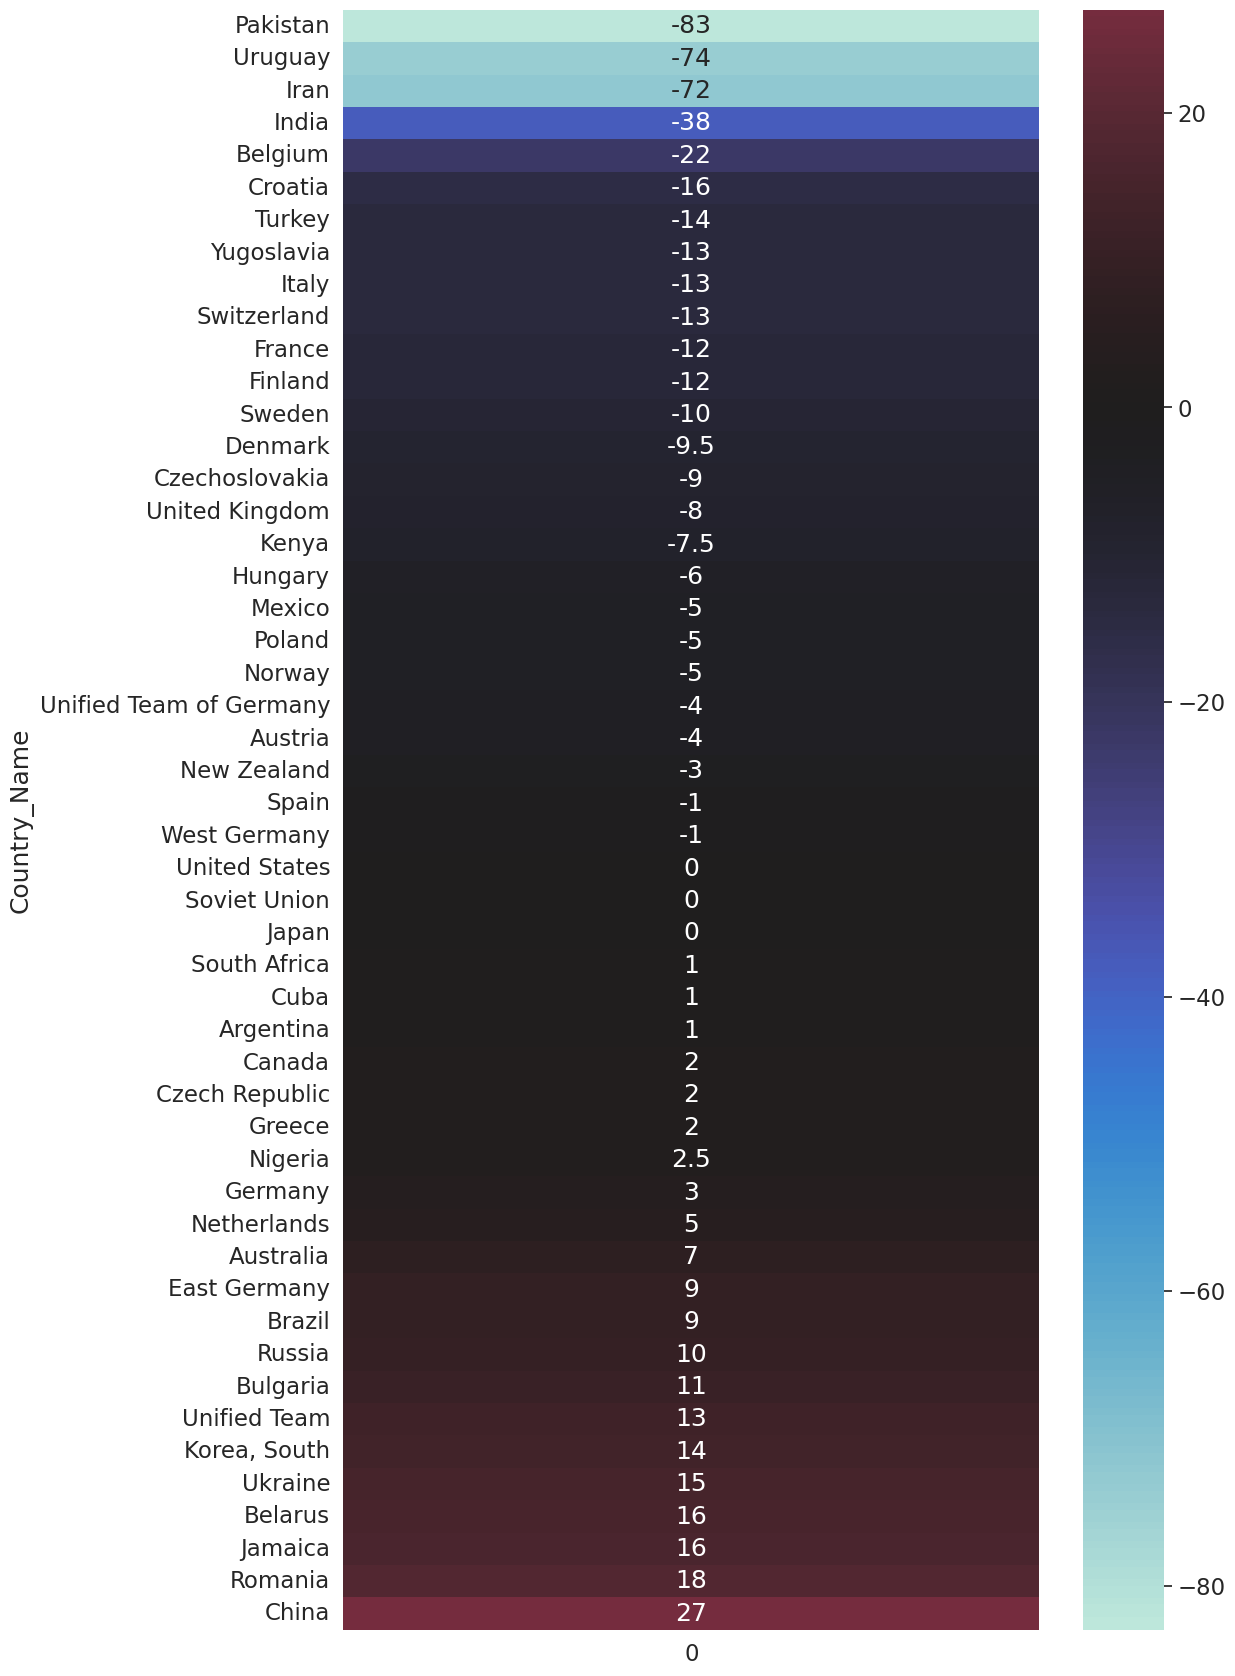

In [169]:
plt.figure(figsize=(10, 20))
sns.heatmap(rank_diff2, annot=True, center = 0)
plt.show()

In Turker, there are more male than female.

Top of the graph, we have Countries where is more common to a Male Athlete succed more than a Female Athlete. And at the bottom we have countries that a Female Athlete succed more than male athletes in general. At the center of the heatmap he have those countries where they equally support male and female athletes.

# Traditional Sports

Creating a Heatmap that shows the ranks of top 20 countries by Sports.
Identifying Traditional sports

In [170]:
olympics.Sport.nunique()

48

In [171]:
olympics.Sport.value_counts()

Sport
Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Luge                  180
Modern Pentathlon     180
Curling               172
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacros

In [172]:
olympics.Country_Name.value_counts()

Country_Name
United States            5238
Soviet Union             2489
United Kingdom           1799
Germany                  1665
France                   1548
                         ... 
Virgin Islands*             1
Guyana                      1
Netherlands Antilles*       1
Iraq                        1
Bermuda*                    1
Name: count, Length: 145, dtype: int64

In [173]:
sport = olympics.Sport.value_counts().index

In [174]:
sport

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object', name='Sport')

In [175]:
top20 = olympics.Country_Name.value_counts().head(20).index

In [176]:
top20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object', name='Country_Name')

In [177]:
sport_country = pd.crosstab(olympics.Country_Name, olympics.Sport)

In [178]:
sport_country

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [179]:
sport_country = sport_country.loc[top20, sport].copy()

In [180]:
sport_country

Sport,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
Country_Name,,,,,,,,,,,,,,,,,,,,,
United States,1184,994,364,178,98,52,280,132,28,180,...,13,27,1,0,0,0,0,0,3,1
Soviet Union,190,238,152,290,116,145,168,91,32,104,...,0,0,0,0,0,0,0,0,0,0
United Kingdom,142,295,244,46,1,24,24,33,126,20,...,18,2,2,12,10,0,4,0,0,2
Germany,176,107,180,71,108,56,10,53,141,58,...,0,0,2,0,0,0,0,0,0,0
France,110,106,96,52,80,286,0,30,0,18,...,0,0,0,12,0,8,1,2,0,0
Italy,127,72,139,109,94,344,0,53,0,31,...,0,0,0,0,0,0,0,0,0,0
Sweden,101,103,10,124,146,26,218,46,0,26,...,0,0,1,0,0,0,0,0,0,0
Canada,119,84,197,8,40,0,359,31,0,159,...,28,1,2,0,0,0,0,0,0,0
Australia,400,84,135,1,10,0,0,0,189,5,...,0,0,5,0,0,0,0,0,0,0


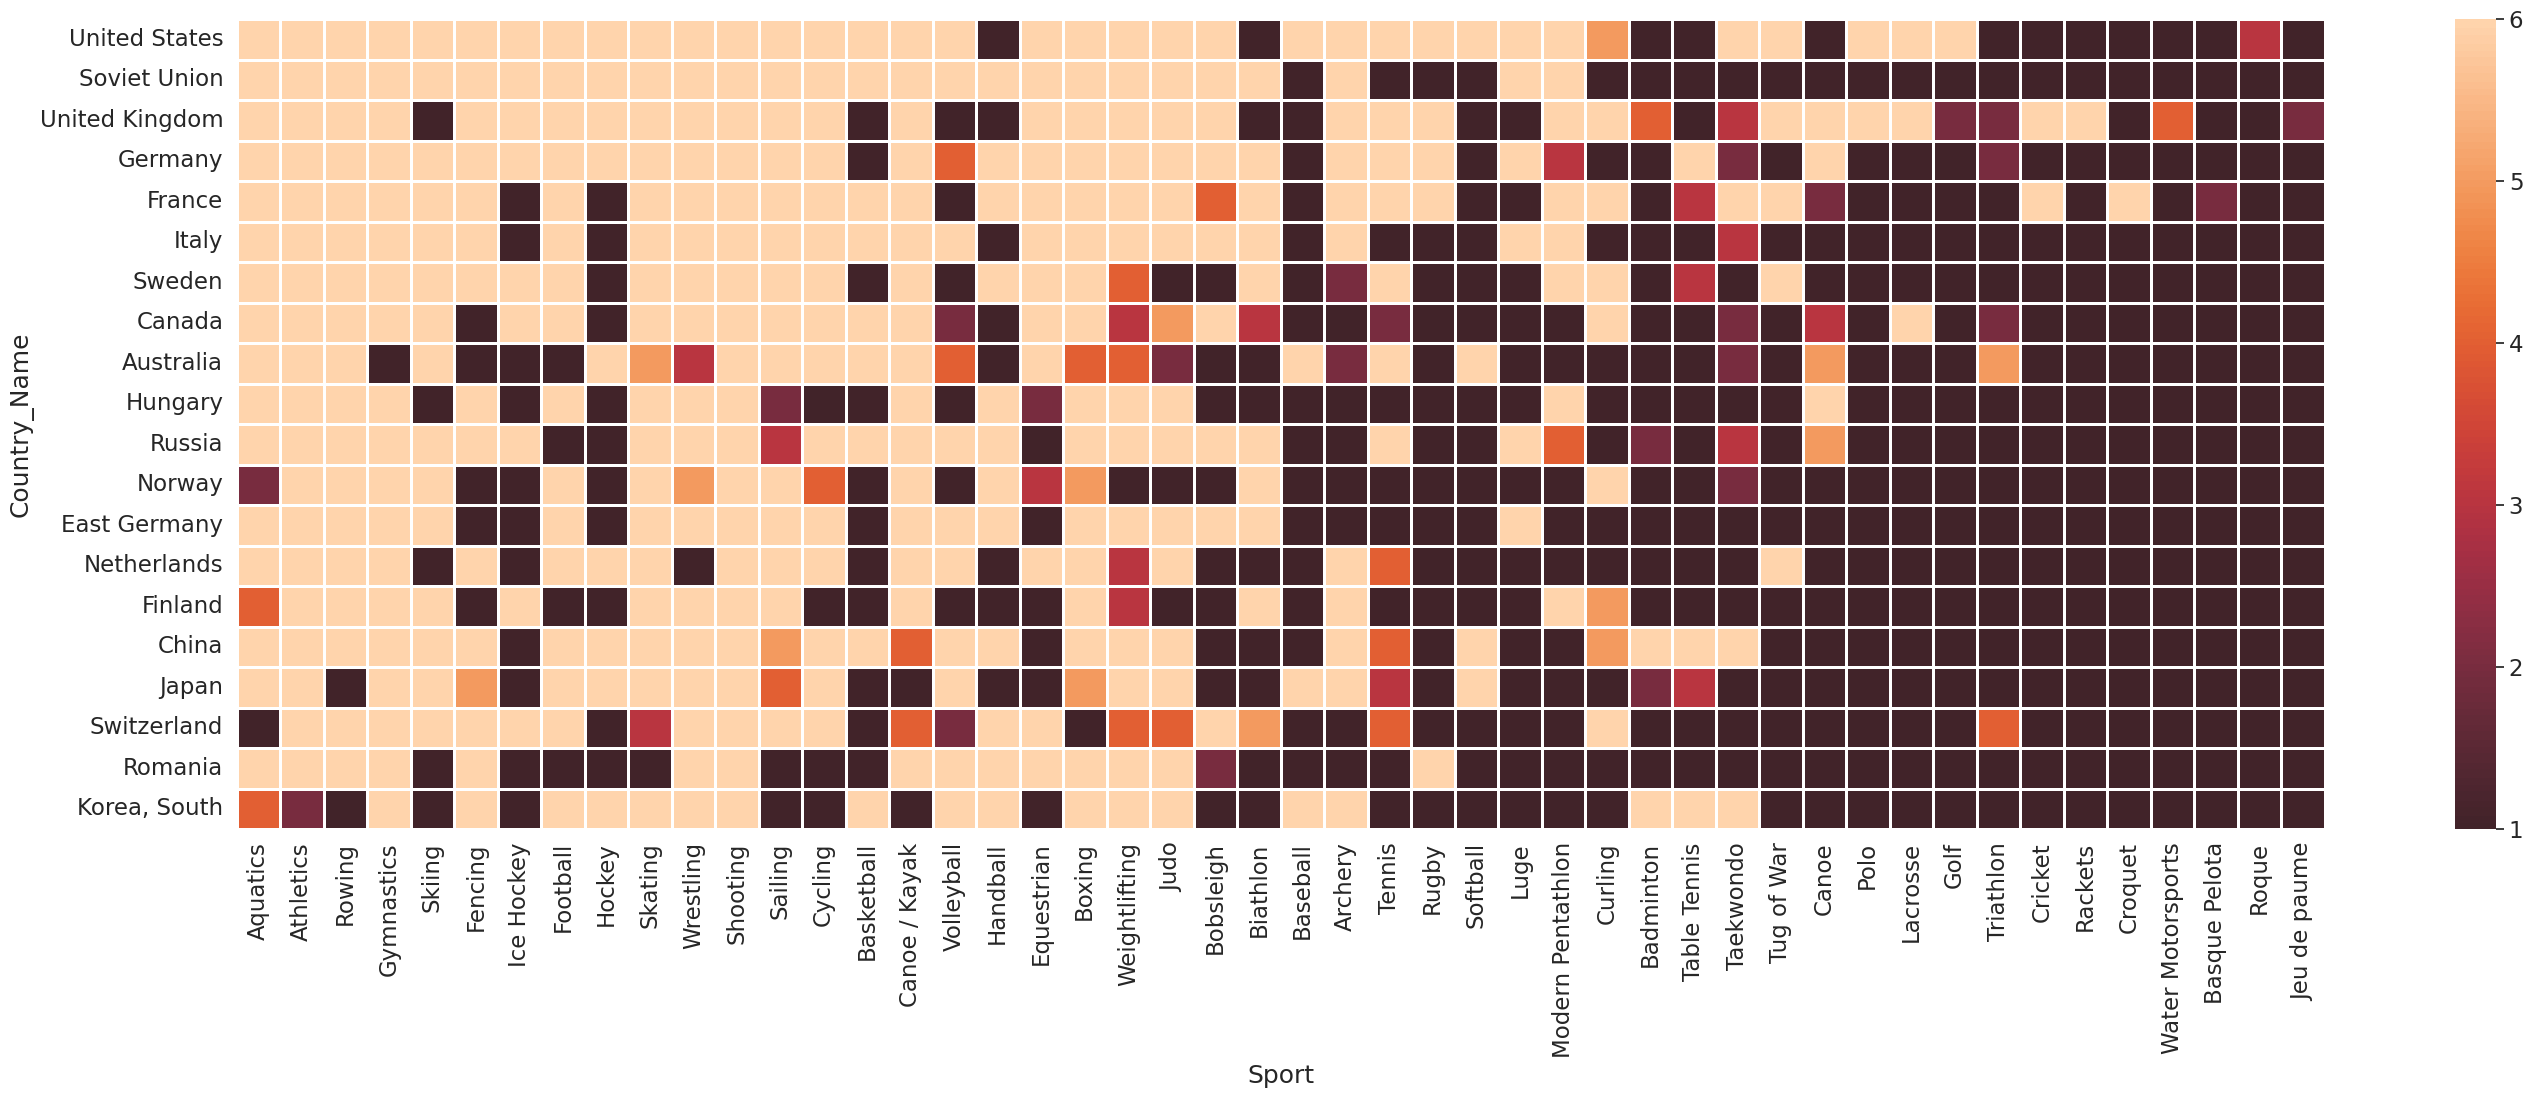

In [181]:
plt.figure(figsize = (30, 10))
sns.heatmap(sport_country, vmin = 1, vmax = 6, center = 0, linewidth =1)
plt.show()

6'ya gittikçe pozitif ilişki artmaktadır.
Kore: Baminton, Table Tennis, Taekwondo